<a href="https://colab.research.google.com/github/EsperanzaCarra/Algoritmos-de-agrupaci-n/blob/main/codigo/TFM_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CARGA DE DATOS

In [ ]:
# carga de datos
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns

Una vez obtenidas las librerías, cargamos nuestro conjunto de datos.

In [ ]:
def upload_files (index_fields):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)
    return df

In [ ]:
kilogramos = upload_files([])

Saving agosto_FINAL.csv to agosto_FINAL.csv
User uploaded file "agosto_FINAL.csv" with length 2513797 bytes


## ALIMENTOS SUPERMERCADO

### Clustering jerárquico aglomerativo
Comenzamos cargando las librerías que vamos a utilizar.

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
kilogramos

,Unnamed: 0,url,supermarket,category,name,price,reference_price,reference_unit,insert_date,product_id
0,16134,https://www.carrefour.es/supermercado/bebida-d...,carrefour-es,30,Bebida de arroz calcio sin azúcar añadido Carr...,0.99,0.99,0,2022-06-15 00:00:00,b0b6a8013d5b9c671be2c01f98f6cb7d
1,16135,https://www.dia.es/compra-online/bebidas/aguas...,dia-es,0,BEZOYA agua mineral natural botella 8 lt,3.19,0.40,0,2022-06-15 00:00:00,53eb5e32ba6658c972d9797562e32969
2,16136,https://www.carrefour.es/supermercado/petit-de...,carrefour-es,29,Petit de fresa Clesa sin lactosa pack de 6 uni...,1.29,2.58,1,2022-06-15 00:00:00,dcdefca90fdcc4c5a0020e59c801615d
3,16137,https://www.carrefour.es/supermercado/pudding-...,carrefour-es,29,Pudding de proteínas sabor vainilla sin azúcar...,1.17,7.80,1,2022-06-15 00:00:00,449e0426ccc719dc8b3a117543798ce9
4,16138,https://www.carrefour.es/supermercado/esparrag...,carrefour-es,7,Espárragos blancos cortos medios 10/18 Carrefo...,1.30,11.82,1,2022-06-15 00:00:00,85b5d9303e40434e2b2cc4a4151094f9
...,...,...,...,...,...,...,...,...,...,...
11434,27585,https://www.carrefour.es/supermercado/agua-min...,carrefour-es,0,Agua mineral con gas Perrier 1 l.,1.37,1.37,0,2022-08-15 00:00:00,fe8c15a29ab05cbff5db8b4901c05257
11435,27586,https://www.carrefour.es/supermercado/agua-min...,carrefour-es,0,Agua mineral con gas Font Vella 1 l.,1.07,1.07,0,2022-08-15 00:00:00,19fb996e97108e0f42538105e7295e16
11436,27587,https://www.carrefour.es/supermercado/agua-min...,carrefour-es,0,"Agua mineral con gas Vichy Catalán natural 1,2 l.",1.61,1.34,0,2022-08-15 00:00:00,41aa54c68da49d82a9c52b132e454878
11437,27588,https://www.carrefour.es/supermercado/agua-min...,carrefour-es,0,Agua mineral con gas Vichy Catalán natural 1 l.,1.29,1.29,0,2022-08-15 00:00:00,68bf6ab77715d1cb568ff94a94aff949


In [ ]:
kilogramos=kilogramos.drop(['Unnamed: 0'], axis=1)


In [ ]:
data=kilogramos.loc[:, ['category', 'reference_price']].values #Tomamos las variables con las que vamos a trabajar
print(data[:10])

[[30.    0.99]
 [ 0.    0.4 ]
 [29.    2.58]
 [29.    7.8 ]
 [ 7.   11.82]
 [20.   17.  ]
 [20.   17.  ]
 [20.    8.6 ]
 [20.   17.  ]
 [20.   25.  ]]


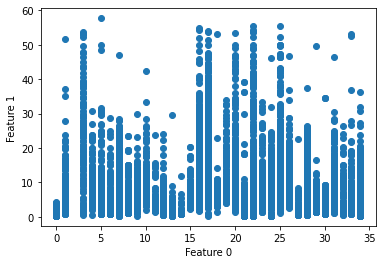

In [ ]:
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

A la hora de aplicar el método, tenemos diferentes disimilitudes y distancias, en este caso, vamos a probar con todas las combinaciones siguientes:

**METHOD:** SINGLE(disimilitud mínima), COMPLETE(disimilitud máxima), AVERAGE(disimilitud media), WARD (minimiza la varianza de los grupos que se fusionan)

 **METRIC:** EUCLIDEAN, CITYBLOCK (manhattan)


In [ ]:
Z = linkage(data, method='single', metric='euclidean')

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# pdist calcula las distancias entre elementos de nuestro dataset usando la 
# métrica indicada (euclideana por defecto)
c, coph_dists = cophenet(Z, pdist(data))
print(c)

0.45149719090757157


In [ ]:
Z = linkage(data, method='single', metric='cityblock')

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# pdist calcula las distancias entre elementos de nuestro dataset usando la 
# métrica indicada (euclideana por defecto)
c, coph_dists = cophenet(Z, pdist(data))
print(c)

0.4663955239331536


In [ ]:
Z = linkage(data, method='complete', metric='cityblock')

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# pdist calcula las distancias entre elementos de nuestro dataset usando la 
# métrica indicada (euclideana por defecto)
c, coph_dists = cophenet(Z, pdist(data))
print(c)

0.7098203855038947


In [ ]:
Z = linkage(data, method='complete', metric='euclidean')

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# pdist calcula las distancias entre elementos de nuestro dataset usando la 
# métrica indicada (euclideana por defecto)
c, coph_dists = cophenet(Z, pdist(data))
print(c)

0.7828635237221696


In [ ]:
Z = linkage(data, method='average', metric='cityblock')

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# pdist calcula las distancias entre elementos de nuestro dataset usando la 
# métrica indicada (euclideana por defecto)
c, coph_dists = cophenet(Z, pdist(data))
print(c)

0.7980400304662769


In [ ]:
Z = linkage(data, method='average', metric='euclidean') 

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# pdist calcula las distancias entre elementos de nuestro dataset usando la 
# métrica indicada (euclideana por defecto)
c, coph_dists = cophenet(Z, pdist(data))
print(c)

0.807938226922826


In [ ]:
Z = linkage(data, method='ward', metric='euclidean') 

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# pdist calcula las distancias entre elementos de nuestro dataset usando la 
# métrica indicada (euclideana por defecto)
c, coph_dists = cophenet(Z, pdist(data))
print(c)

0.6757560934517488


Se ha aplicado el método jerárquico con disimilitud máxima, mínima, media y ward, y también, con las distancias euclídea y manhattan. Una vez aplicadas 7 las  combinaciones posibles hemos observado los coeficientes de bondad obtenidos. Este coeficiente compara las distancias reales entre todas las muestras del dataset con aquellas que implica el clustering seleccionado, y, cuanto más cerca se encuentre del valor 1, mejor preserva el clustering seleccionado las distancias originales. El resultado más próximo a 1 se ha conseguido con los siguientes datos:

* DISIMILITUD MEDIA
* DISTANCIA EUCLIDEEA

Se ha obtenido un coeficiente de 0.8079, y, por tanto, es el clustering que mejor preserva las distancias originales

Sin embargo, una vez llevado a cabo distintas pruebas del método, se ha comprobado que los resultados que mejor se adaptan al trabajo se obtienen con los datos:

* DISIMILITUD WARD
* DISTANCIA EUCLIDEA


**FUNCIÓN Z**

La salida de la función Z es un vector de longitud k-1 que nos dará información de las operaciones realizadas en cada paso. Es decir, las k-1 uniones que han tenido lugar durante el clustering.

Z[i] nos dirá qué clusters fueron unidos en la iteración i:


In [ ]:
Z[0]

array([0.000e+00, 2.697e+03, 0.000e+00, 2.000e+00])

Los dos primeros elementos añadidos han sido el 0 y el 2697, con una distancia de 0. Esto quiere decir que los productos, a pesar de ser dos alimentos diferentes, tienen el mismo precio y se localizaban en la misma categoría.

Lo comprobamos.

In [ ]:
print(kilogramos['name'][0])
print(kilogramos['category'][0])
kilogramos['reference_price'][0]

Bebida de arroz calcio sin azúcar añadido Carrefour sin gluten brik 1 l.
30


0.99

In [ ]:
print(kilogramos['name'][2697])
print(kilogramos['category'][2697])
kilogramos['reference_price'][2697]

Horchata de chufa Carrefour brik 1 l.
30


0.99

Efectivamente el razonamiento es correcto. Nos encontramos con dos productos totalmente diferentes: "Bebida de arroz calcio sin azúcar añadido Carrefour sin gluten brik 1 l." y "Horchata de chufa Carrefour brik 1 l." pero con idénticos precio e idéntica categoría.

**VEAMOS EL DENDROGRAMA**


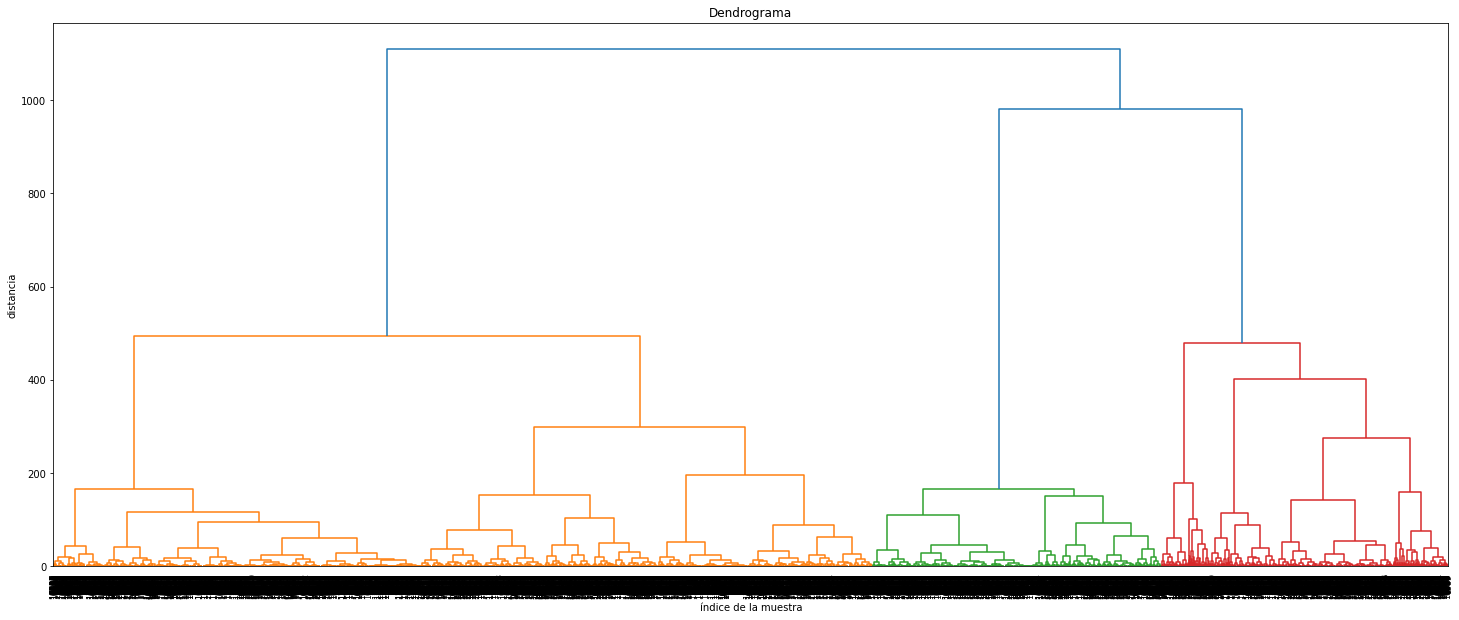

In [ ]:
#calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Dendrograma')
plt.xlabel('índice de la muestra')
plt.ylabel('distancia')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Como era de esperar, el dendograma al completo, es decir, con todas las uniones de los elementos, es muy difícil de interpretar, e incluso, ha tardado bastante en compilar por su alto coste computacional. Esto se puede solucionar mostrando únicamente las últimas uniones, pero, antes de ello, veamos algunas conclusiones:
1. Ha formado tres grupos, los cuales se muestran en el dendrograma con diferentes colores. 
2. Las líneas horizontales son uniones de clusters según la distancia.
3. Las líneas verticales indican que clústers son parte de cada unión.
4. Las alturas de las líneas verticales nos indican la distancia que se encontró al hacer la unión.


Veamos las **ultimas uniones**

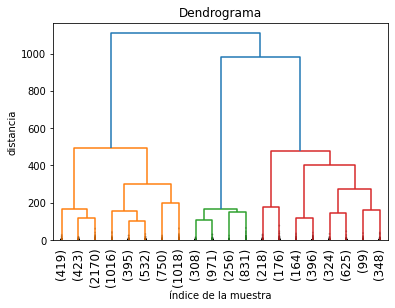

In [ ]:
# quedarnos con las últimas p uniones
plt.title('Dendrograma')
plt.xlabel('índice de la muestra')
plt.ylabel('distancia')
dendrogram(
    Z,
    truncate_mode='lastp',  # mostrar solo las últimas p uniones
    p=20,  # definimos p
    leaf_rotation=90.,
    leaf_font_size=12,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

El dendrograma resumido es más sencillo de comprender.

Se muestran las distancias

In [ ]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

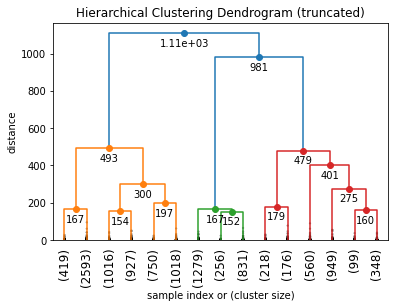

In [ ]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=15,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1,  # useful in small plots so annotations don't overlap
)
plt.show()

**Se toma una distancia**

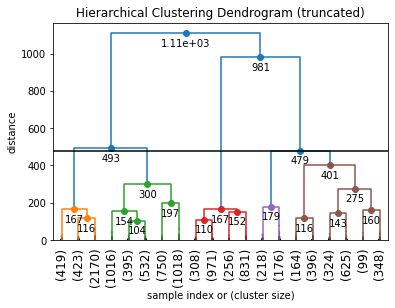

In [ ]:
d_max = 478

fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1,
    max_d=d_max,  # plot a horizontal cut-off line
)
plt.show()

Tomando distancia 478 se formarían 5 grupos. Según la distancia que se tome, se tendrían más o menos grupos.

A pesar, de que gráficamente el dendrograma nos "recomienda" formar 3 grupos, vamos a aplicar la clasificación con 3, 10 y 20 para observar las diferencias.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters=cluster.fit_predict(data)

Observemos las 500 primeras clasificaciones.  

In [ ]:
print(clusters[:500])

[0 2 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 1 1 0 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 2 0 0 0 0 2 0 1 1 2 1 0 0 1 0 0 0 2
 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 2 0 0 0 0
 1 1 0 0 2 2 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 2
 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 2 1 0 1 1
 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 2 1 0 0 1 0 0 1
 1 0 1 0 0 0 1 2 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 2 2
 1 1 1 1 1 0 1 0 0 2 1 0 0 1 0 1 0 2 2 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0
 1 1 1 1 1 1 1 2 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 2 0 1 0 1 2 2 0 0 1 0 0
 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 2 0 2 0 2 0 0 2 0 0 1 1 1 1 0 2 2 0
 0 0 0 2 2 2 1 2 0 0 1 1 0 1 2 1 2 2 2 0 2 0 2 0 0 0 2 2 2 0 0 2 0 1 2 0 0
 0 0 2 0 2 2 0 0 1 1 0 0 0 2 2 2 2 0 2 2 2 0 0 0 2 2 2 2 0 1 1 0 0 0 0 0 0
 2 2 2 2 1 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 2 0 0 0 2 2 1 0 0 0 0 0 2
 1 0 1 0 0 2 2 2 0 2 2 0 

Una vez predicho el grupo al que pertenece cada alimento, se va a observar gráficamente como se ha llevado a cabo la organización de los elementos y los clústers.

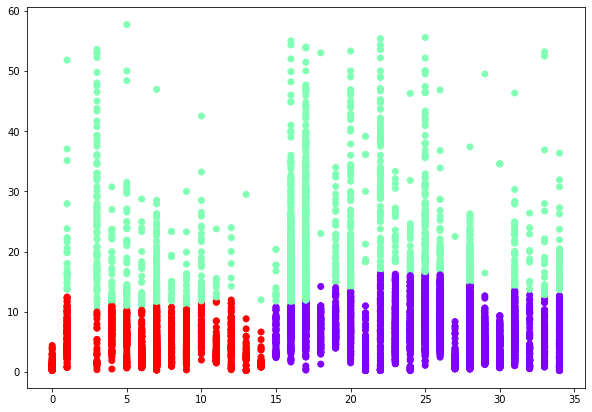

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

Observamos fácilmente la distribución de los 3 grupos formados.

En la gráfica se puede concluir que se debería tomar los grupos rojo y azul marino para obtener la lista de la compra, ya que son los grupos que contienen los precios más económicos. 

Se observa, que el grupo rojo llega a un valor de aproximadamente 13€ y el grupo azul mariano a un valor de aproximadamente 18€. Estos precios pueden resultar un poco altos, por ello, vamos a probar el método realizando más grupos.

*10 GRUPOS*

In [ ]:
cluster= AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
clusters=cluster.fit_predict(data)

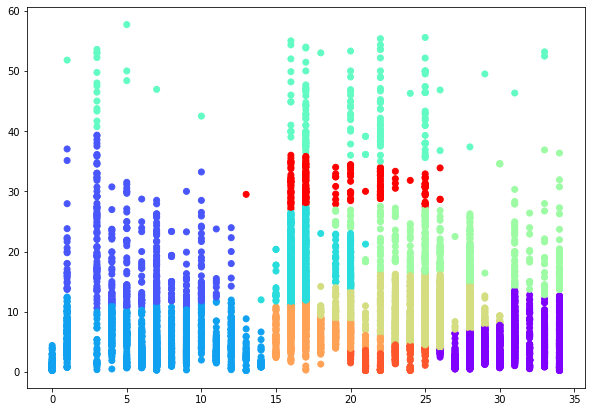

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

*20 GRUPOS*

In [ ]:
cluster= AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')
clusters=cluster.fit_predict(data)

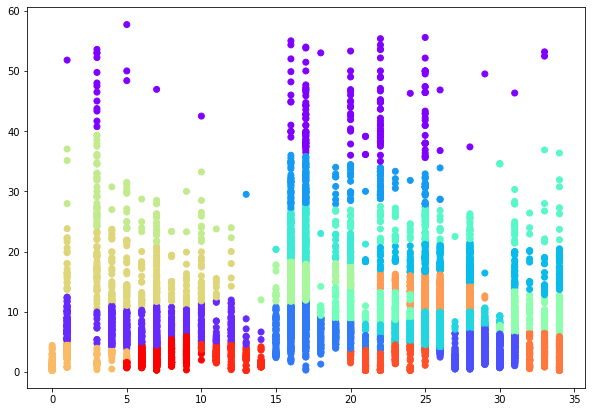

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

Observamos que cuantos más grupos escojamos, menor precio podemos encontrar en alguno de los conjuntos creados por el algoritmo, es decir, más económica podría ser la compra.
Aplicando el método con 10 grupos podemos encontrar los alimentos con un precio máximo de 15€, pero, sin embargo, aplicando el método con 20 grupos, podemos encontrar los productos con un coste máximo de aproximadamente 9 en casi todas las categorías.


A pesar de lo anteriormente dicho, se va a crear el modelo con K=15, ya que se ha comprobado que con K=15,16,17,18,19 y 20 la compra mensual final tiene el mismo precio. Esto es debido a que los conjuntos con menor precio por categoría son idénticos, es decir, los nuevos grupos creados son formados con los alimentos de mayor presupuesto. Se ha de destacar también, que, con 14 conjuntos, la compra mensual final era superior que con 15 grupos. 


15 GRUPOS.

In [ ]:
cluster= AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='ward')
clusters=cluster.fit_predict(data)

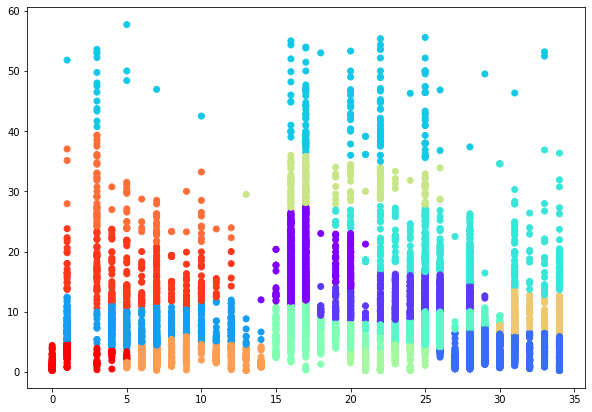

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

In [ ]:
a=cluster.labels_

Añadimos la clasificación a nuestra base de datos.

In [ ]:
kilogramos['cluster_jerarquico']= a

Ahora, se buscan los 5 grupos que gráficamente observamos que tienen menor precio.

**GRUPO 0**

In [ ]:
grupo0=kilogramos[(kilogramos['cluster_jerarquico'] ==  0)]
grupo0['reference_price'].describe()

count    949.000000
mean      17.272226
std        3.870006
min       11.240000
25%       14.334000
50%       16.360000
75%       19.950000
max       27.450000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo0['category'])

array([20, 16, 17, 15, 19, 14, 21, 18])

**GRUPO 1**

In [ ]:
grupo1=kilogramos[(kilogramos['cluster_jerarquico'] ==  1)]
grupo1['reference_price'].describe()

count    927.000000
mean      11.954362
std        1.869295
min        8.400000
25%       10.515000
50%       11.760000
75%       13.210000
max       16.500000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo1['category'])

array([20, 24, 18, 25, 28, 23, 26, 19, 22, 29, 21])

**GRUPO 2**

In [ ]:
grupo2=kilogramos[(kilogramos['cluster_jerarquico'] ==  2)]
grupo2['reference_price'].describe()

count    2593.000000
mean        3.072807
std         1.654896
min         0.270000
25%         1.700000
50%         2.764000
75%         4.390000
max         7.500000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo2['category'])

array([30, 29, 27, 34, 31, 28, 33, 32, 26])

**GRUPO 3**

In [ ]:
grupo3=kilogramos[(kilogramos['cluster_jerarquico'] ==  3)]
grupo3['reference_price'].describe()

count    831.000000
mean       7.333617
std        1.856871
min        3.900000
25%        5.800000
50%        7.050000
75%        8.760000
max       12.440000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo3['category'])

array([ 1,  4,  9,  7,  5,  6, 12, 11,  8, 10, 14,  3, 13])

**GRUPO 4**

In [ ]:
grupo4=kilogramos[(kilogramos['cluster_jerarquico'] ==  4)]
grupo4['reference_price'].describe()

count    176.000000
mean      43.833080
std        5.479031
min       35.000000
25%       39.128250
50%       43.125000
75%       47.390000
max       57.700000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo4['category'])

array([16, 20,  1, 17, 25,  3, 22, 26, 28, 29, 10, 21, 33, 18, 24,  7, 31,
        5])

**GRUPO 5**

In [ ]:
grupo5=kilogramos[(kilogramos['cluster_jerarquico'] ==  5)]
grupo5['reference_price'].describe()

count    560.000000
mean      19.779875
std        3.916759
min       12.820000
25%       16.947500
50%       18.890000
75%       22.159750
max       36.875000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo5['category'])

array([20, 28, 31, 22, 25, 34, 26, 19, 21, 23, 24, 33, 30, 32, 27, 29])

**GRUPO 6**

In [ ]:
grupo6=kilogramos[(kilogramos['cluster_jerarquico'] ==  6)]
grupo6['reference_price'].describe()

count    1016.000000
mean        7.315469
std         1.524674
min         4.000000
25%         6.110000
50%         7.490000
75%         8.390000
max        10.640000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo6['category'])

array([29, 25, 26, 24, 28, 23, 22, 30, 27, 21])

**GRUPO 7**

In [ ]:
grupo7=kilogramos[(kilogramos['cluster_jerarquico'] ==  7)]
grupo7['reference_price'].describe()

count    1018.000000
mean        7.191989
std         2.224965
min         0.310000
25%         5.630000
50%         7.200000
75%         8.833000
max        11.720000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo7['category'])

array([20, 16, 17, 18, 15, 21, 19, 22])

**GRUPO 8**

In [ ]:
grupo8=kilogramos[(kilogramos['cluster_jerarquico'] ==  8)]
grupo8['reference_price'].describe()

count    750.000000
mean       2.015293
std        1.195825
min        0.240000
25%        0.960000
50%        1.945000
75%        2.980000
max        4.600000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo8['category'])

array([20, 21, 24, 25, 22, 23])

**GRUPO 9**

In [ ]:
grupo9=kilogramos[(kilogramos['cluster_jerarquico'] ==  9)]
grupo9['reference_price'].describe()

count    218.000000
mean      31.034679
std        2.147650
min       27.050000
25%       29.442500
50%       30.740000
75%       32.747250
max       36.000000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo9['category'])

array([20, 16, 25, 22, 17, 19, 23, 26, 24, 21, 13])

**GRUPO 10**

In [ ]:
grupo10=kilogramos[(kilogramos['cluster_jerarquico'] ==  10)]
grupo10['reference_price'].describe()

count    419.000000
mean       8.876609
std        1.830904
min        6.220000
25%        7.375000
50%        8.480000
75%       10.145000
max       13.450000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo10['category'])

array([31, 30, 34, 33, 32])

**GRUPO 11**

In [ ]:
grupo11=kilogramos[(kilogramos['cluster_jerarquico'] ==  11)]
grupo11['reference_price'].describe()

count    1279.000000
mean        2.558979
std         1.175657
min         0.240000
25%         1.590000
50%         2.470000
75%         3.410000
max         6.061000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo11['category'])

array([ 6, 11,  7,  9, 12,  8,  5, 13, 10, 14])

**GRUPO 12**

In [ ]:
grupo12=kilogramos[(kilogramos['cluster_jerarquico'] ==  12)]
grupo12['reference_price'].describe()

count    99.000000
mean     27.859343
std       4.572714
min      21.667000
25%      24.097000
50%      26.540000
75%      30.605000
max      39.330000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo12['category'])

array([ 4,  5, 10,  9,  6, 12,  3,  7,  8,  1, 11])

**GRUPO 13**

In [ ]:
grupo13=kilogramos[(kilogramos['cluster_jerarquico'] ==  13)]
grupo13['reference_price'].describe()

count    348.000000
mean      15.048391
std        3.196594
min       10.620000
25%       12.596000
50%       14.000000
75%       17.192500
max       23.800000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo13['category'])

array([ 7, 11,  9,  4, 10,  6,  3,  1,  5,  8, 12])

**GRUPO 14**

In [ ]:
grupo14=kilogramos[(kilogramos['cluster_jerarquico'] ==  14)]
grupo14['reference_price'].describe()

count    256.000000
mean       1.962742
std        1.402519
min        0.240000
25%        0.530000
50%        1.530000
75%        3.157500
max        4.980000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo14['category'])

array([0, 1, 4, 3, 5])

Observando tanto la gráfica como la descripción de cada grupo, se han obtenido los precios más económicos de cada categoría en los siguientes grupos.

* GRUPO 2. Categorías: 26,27,28,29,30,31,32,33,34
* GRUPO 7. Categorías: 15,16,17,18,19
* GRUPO 8. Categorías: 20,21,22,23,24,25
* GRUPO 11. Categorías: 5,6,7,8,9,10,11,12,13,14
* GRUPO 14. Categorías: 0,1,3,4


**TOMAMOS UNA LISTA DE LA COMPRA AL AZAR** para observar el precio obtenido. Esta lista será tomada según las recomendaciones de los especialistas.

CATEGORIA	CONSUMO AL MES
* Frutas 	90 raciones (mínimo 3 raciones al día)
* Verduras y hortalizas	60 raciones (mínimo 2 raciones al día)
* Cereales integrales o de grano entero	30-60 raciones (1-2 porciones al día)
* Frutos secos	900 gramos (30 gramos diarios)
* Legumbres	8-12 raciones (2-3 raciones a la semana)
* Aceite de oliva virgen o virgen extra	300-600 mililitros (10-20 mililitros al día)
* Huevos 	12-20 unidades (3-5 unidades a la semana)
* Leche y productos lácteos	60-160 raciones (2-4 raciones al día)
* Pescado y marisco	4-12 raciones (2-3 raciones a la semana)
* Carnes blancas	30 raciones (1 ración diaria)
* Carnes rojas	4 raciones (1 ración semanal)
* Ultraprocesados (alimentos ricos en azúcar, sal, grasa de mala calidad, potenciadores del sabor, harinas refinadas y componentes especialmente nocivos. )	No se recomienda, cuanto menos se consuman mejor para la salud. 
3 raciones al mes.


**FRUTA**

In [ ]:
fruta=grupo11[(grupo11['category']==6)]

In [ ]:
preciofruta=fruta.sample(n = 20, replace=True, random_state=5)
preciofruta.sum()

url                   https://www.dia.es/compra-online/frescos/fruta...
supermarket           dia-escarrefour-escarrefour-esdia-esmercadona-...
category                                                            120
name                  Uva blanca sin semilla bandeja 500 grMelón pie...
price                                                             46.88
reference_price                                                   50.96
reference_unit                                                       19
insert_date           2022-08-15 00:00:002022-08-15 00:00:002022-08-...
product_id            fc3dc9368218c5999b51c1d82ef490a33e652b5ecae0ec...
cluster_jerarquico                                                  220
dtype: object

**Justificación de tomar n=20 en vez de 90**

No todos los productos de la categoría "fruta" se componen de una única porción de alimento, si no que, por ejemplo, elementos como la sandía o una bandeja de kiwis obtienen muchas más porciones. Por ello, se ha llevado a cabo una estimación de la cantidad de productos a seleccionar.

Para efectuar dicha estimación, se ha tomado como referencia un artículo de la OCU dónde hablan sobre los precios de la fruta. En este artículo se enuncian dos puntos claves para la estimación que se ha llevado a cabo. El primero es que una familia de 4 miembros que cumpla las recomendaciones de los nutricionistas, gastaría únicamente en fruta unos 200€ mensuales, lo que quiere decir que una persona individualmente invertiría unos 50€ al mes. El segundo punto es que el precio medio por ración de fruta es alrededor de unos 0,595€, lo que, si se multiplica por 90 porciones mensuales, son unos 53,55€.

Por lo anteriormente dicho, se ha escogido n=20 puesto que, al efectuar diferentes  pruebas con 20 alimentos elegidos al azar, se obtenían precios alrededor de 50€.


PÁGINA WEB SE HA OBTENIDO LA INFORMACIÓN. PARA REFERENCIAR EN EL WORD.

https://www.ocu.org/alimentacion/comer-bien/noticias/precio-fruta-verano

**CEREALES**

In [ ]:
cereales=grupo11[(grupo11['category']==8) | (grupo11['category']==9)]

In [ ]:
preciocereales=cereales.sample(n = 8, replace=True, random_state=2)
preciocereales.sum()

url                   https://tienda.mercadona.es/product/22278/quin...
supermarket           mercadona-escarrefour-esdia-escarrefour-esmerc...
category                                                             67
name                  Quinoa cocida blanca y roja SabrozTortiglioni ...
price                                                             12.17
reference_price                                                  28.456
reference_unit                                                        9
insert_date           2022-08-15 00:00:002022-07-13 00:00:002022-08-...
product_id            9430e3f764baf0eb3493e05873f2dc809d716e4f98b7c6...
cluster_jerarquico                                                   88
dtype: object

**Justificación de tomar n=8 en vez de 30-60**


En esta categoría  vuelve a ocurrir como ocurría con la categoría frutas. Si tomamos un producto de la categoría cereales, la mayoría de las veces será más de una porción, ya que nos encontraremos con productos del estilo: bolsa de pan de molde, la Fallera arroz 500g, macarrones Carrefour 1kg...

Echando un vistazo a los productos de la categoría cereales que se encuentran en el grupo seleccionado, se ha observado que un gran porcentaje de ellos tenía como mínimo unos 450gr, encontrándose, por supuesto, productos con más y menos cantidad. 

Si, además, se tiene en cuenta que la porción de cereales recomendada según la OCU es de unos 60g, y que los especialistas del proyecto recomiendan unas 30-60 porciones al mes, se debe tomar entre unos 1800-3600g de cereal mensualmente.

Si, tomamos los 3600g que se deben consumir mensualmente y lo dividimos entre los 450gr que se ha observado que tienen como mínimo los productos, se tendría un total de 8 productos.

Por tanto, se ha tomado un valor de n=8. No se ha tomado un valor mayor ya que en todas las pruebas realizadas siempre aparecía algún producto con más de 450g, por tanto, si aparecía un producto con menos de 450g, el producto con más gramos lo recompensaba.


PÁGINA WEB RECOMENDACION OCU 60G DE CEREALES EN UNA PORCIÓN.
https://www.ocu.org/alimentacion/comer-bien/noticias/recomendaciones-dieteticas-aesan





**VERDURAS Y HORTALIZAS**

In [ ]:
verdura=grupo11[(grupo11['category']==7)]

In [ ]:
precioVerdura=verdura.sample(n = 25, replace=True, random_state=3)
precioVerdura.sum()

url                   https://tienda.mercadona.es/product/61406/pata...
supermarket           mercadona-escarrefour-esmercadona-esdia-esmerc...
category                                                            175
name                  Patatas corte grueso Hacendado ultracongeladas...
price                                                             44.09
reference_price                                                  57.711
reference_unit                                                       22
insert_date           2022-08-15 00:00:002022-08-15 00:00:002022-08-...
product_id            b646a19e7548ca1a66a3a189136a3fe0d61ce24fe57cf3...
cluster_jerarquico                                                  275
dtype: object

En esta ocasión, para calcular n=25, se ha acudido a las diferentes páginas webs de los supermercados del análisis, es decir, Carrefour, Día y Mercadona. Una vez abiertos los enlaces, se ha ido a la sección de verduras y hortalizas, y, se han apuntado todos los precios por porción de cada alimento, para llevar a cabo, a continuación, la media de todos ellos.

Se ha obtenido un valor de 0.69€ por porción, que, multiplicado por las 60 porciones mensuales, sería un total de 41.4€ al mes.

Por ello, se han probado con diferentes cantidades para n, y se ha llegado a la conclusión de que con la cantidad de n=25 se mostraban valores alrededor de 42€.

---



**FRUTOS SECOS**

In [ ]:
frutos_secos=grupo11[(grupo11['category']==10)]

In [ ]:
preciofrutos=frutos_secos.sample(n = 5, replace=True, random_state=3)
preciofrutos.sum()

url                   https://tienda.mercadona.es/product/34212/palo...
supermarket           mercadona-esmercadona-esmercadona-esmercadona-...
category                                                             50
name                  Palomitas de maíz sabor mantequilla Hacendado ...
price                                                              7.25
reference_price                                                   21.69
reference_unit                                                        5
insert_date           2022-08-15 00:00:002022-08-15 00:00:002022-08-...
product_id            495bf82d2090e9530c06db120fc9f59acb93e19bf23d0a...
cluster_jerarquico                                                   55
dtype: object

Para calcular la cantidad de frutos secos que se deben tomar, se ha realizado a base de prueba y error. Es decir, se ha comenzado con n=1 y se ha ido subiendo la cantidad de productos a escoger. Con cada n se han llevado a cabo repetidas iteraciones hasta encontrar como mínimo la cantidad de 900g de frutos secos en cada iteración (cantidad recomendada por los especialistas, tabla XXX). Una vez ejecutadas las pruebas, se ha llegado a la conclusión de que la mayoría de las veces se llegaba al mínimo exigido con n=3. Sin embargo, se ha escogido n=5 por dos motivos: 1) Asegurarse que en la totalidad de las veces se obtuvieran como mínimo 900 gramos. 2) Si en un futuro se aplica un algoritmo de clasificación diferente o se tiene una base de datos con otros productos, se llegue con seguridad al mínimo de gramos recomendado por los especialistas.

**LEGUMBRES**

In [ ]:
legumbres=grupo11[(grupo11['category']==11)]

In [ ]:
preciolegumbres=legumbres.sample(n = 2, replace=True, random_state=8)
preciolegumbres.sum()

url                   https://www.dia.es/compra-online/despensa/arro...
supermarket                                                dia-esdia-es
category                                                             22
name                  DIA VEGECAMPO garbanzos extra paquete 1 KgDIA ...
price                                                              3.42
reference_price                                                    4.58
reference_unit                                                        2
insert_date                      2022-08-15 00:00:002022-08-15 00:00:00
product_id            404949d157f1e55ef55c4dbf2a68e6264652c2e8ae20a3...
cluster_jerarquico                                                   22
dtype: object

Según un informe del Ministerio de Agricultura, Pesca y Alimentación del 2019, el precio medio de legumbres en esas fechas era de unos 1,92 €/kilo. Teniendo en cuenta, que la OCU informa que las legumbres han subido su precio en un 3,1%, a día de hoy se encontrarían con un coste de: 1.98€/kilo.


Ahora bien, si se considera que la OCU informa que una ración son unos 50g-60g y se deben tomar unas 8-12 raciones al mes, el consumo de legumbres se encontraría en el intervalo 400g-720g.

Es decir, si el precio de un kilo es aproximadamente unos 2€ y se tienen que tomar como máximo unos 720g, con escoger alimentos que lleguen a los 2€ se tendría suficiente cantidad de legumbres para un mes.

Se ha tomado n=2, aunque con n=1 se llegaba a los 2€ en la mayoría de las pruebas, en algunas ocasiones el azar ofrecía alimentos de 450g, llegando al mínimo recomendado, pero no al máximo.

https://diario.madrid.es/cieacasadecampo/wp-content/uploads/sites/61/2021/02/informe-consumo-legumbre-2019.pdf


**HUEVOS**

In [ ]:
huevos=grupo11[(grupo11['category']==13)]

In [ ]:
preciohuevos=huevos.sample(n = 3, replace=True, random_state=2)
preciohuevos.sum()

url                   https://tienda.mercadona.es/product/31010/huev...
supermarket                                    mercadona-esdia-esdia-es
category                                                             39
name                  Huevos cocidosHuevos frescos categoría A clase...
price                                                              5.34
reference_price                                                    3.48
reference_unit                                                        7
insert_date           2022-08-15 00:00:002022-08-15 00:00:002022-08-...
product_id            bab904b718b91de65d53a854686e2e52bd1ad3b25a03db...
cluster_jerarquico                                                   33
dtype: object

Los especialistas recomiendan de 12 a 20 unidades al mes. Como las bandejas de huevos siempre se venden como mínimo con una cantidad de media docena, se ha tomado n=3 ya que 6+6+6=18 porciones, encontrándose 18 en un valor entre 12 y 20 que son las porciones recomendadas.

**LACTEOS**

In [ ]:
lacteos1=grupo11[(grupo11['category']==14)]
lacteos2=grupo7[(grupo7['category']==15) | (grupo7['category']==16)]

In [ ]:
lacteos = pd.concat([lacteos1, lacteos2])

In [ ]:
preciolacteos=lacteos.sample(n = 22, replace=True, random_state=3)
preciolacteos.sum()

url                   https://tienda.mercadona.es/product/22711/mant...
supermarket           mercadona-escarrefour-esmercadona-escarrefour-...
category                                                            345
name                  Mantequilla ligera PresidentNata montada azuca...
price                                                             62.79
reference_price                                                 160.464
reference_unit                                                       22
insert_date           2022-08-15 00:00:002022-07-03 00:00:002022-08-...
product_id            99970a7cceee1f362a427a61dc2a224d457f9831ea007f...
cluster_jerarquico                                                  158
dtype: object

En esta ocasión se ha tomado n=22.

El motivo de esta aproximación es el siguiente: la OCU recomienda unos 200-250ml de leche y unos 80g de queso. Los cartones de leche que se localizan en los supermercados suelen tener aproximadamente la cantidad de un litro (4 porciones) y el queso entre 250-750gramos (3-9 porciones).

Por tanto, al tomar productos al azar, se tiene una media de unas 5 porciones por producto. Considerando que los especialistas recomiendan unas 110 porciones de productos lácteos, si lo dividimos entre las 5 porciones que se han obtenido de media, se llega a la conclusión de n=22.

**PESCADO**

In [ ]:
pescado=grupo7[(grupo7['category']==17)]

In [ ]:
preciopescado=pescado.sample(n = 5, replace=True, random_state=1)
preciopescado.sum()

url                   https://www.carrefour.es/supermercado/langosti...
supermarket           carrefour-esmercadona-esmercadona-esmercadona-...
category                                                             85
name                  Langostino cocido ecológico Carrefou Bio 700 g...
price                                                             24.89
reference_price                                                  51.095
reference_unit                                                        5
insert_date           2022-08-02 00:00:002022-08-15 00:00:002022-08-...
product_id            84ec887e2c76c47f4d8f038b62a21cbcaf1bf4d0ce0aa0...
cluster_jerarquico                                                   35
dtype: object

Según la página web dedicada a la realización de estadísticas statista, el precio medio del pescado en el 2021 por kilogramo fue de unos 9.09€/k. https://es.statista.com/estadisticas/626944/precio-medio-del-pescado-por-tipo-en-espana/   


Teniendo en cuenta que según la OCU el pescado ha subido su precio en 1.3%  https://www.ocu.org/organizacion/prensa/notas-de-prensa/2022/ipcfebrero2022 el precio actual por kilogramo del pescado sería de unos 9.21€/k.

Según los especialistas se deben tomar unas 4-12 raciones de pescado, y según la OCU, la ración de pescado debe ser de unos 125g-150g. Es decir, se deben tomar unos 500g-1.800g de pescado al mes.

Teniendo en cuenta que como máximo se deben tomar 2kilos de pescado al mes, y dos kilos tendrían un precio aproximado de 19€, se han llevado a cabo diferentes pruebas para tomar el valor de n, llegando a la conclusión de que con n=5 se obtenían valores alrededor de unos 20€.



**CARNE BLANCA**

In [ ]:
blanca=grupo7[(grupo7['category']==18)]

In [ ]:
precioblanca=blanca.sample(n = 7, replace=True, random_state=3)
precioblanca.sum()

url                   https://www.dia.es/compra-online/frescos/carne...
supermarket           dia-escarrefour-esmercadona-escarrefour-escarr...
category                                                            126
name                  Cuartos traseros de pollo selección (peso apro...
price                                                             30.24
reference_price                                                   36.94
reference_unit                                                        8
insert_date           2022-08-15 00:00:002022-07-03 00:00:002022-08-...
product_id            0c570f71ccc832e28267acc3e949fb85c5959867bf005c...
cluster_jerarquico                                                   49
dtype: object

Los productos que se localizan en la base de datos y poseen la categoría "carne_blanca" tienen aproximadamente valores entre 400g a 2kg de cantidad de producto. 

Por tanto, como los especialistas recomiendan unas 30 raciones al mes, y la OCU informa que una ración debe tener una cantidad de 100g, los productos del conjunto de datos tienen entre 4 y 20 porciones. Tomando el valor  menor, para asegurarse de tener todas las porciones al completo, se obtendría un valor de n=7 (30 porciones al mes recomendadas / 4 porciones que tienen los productos)

**CARNE ROJA**

In [ ]:
roja=grupo7[(grupo7['category']==19)]

In [ ]:
precioroja=roja.sample(n = 2, replace=True, random_state=3)
precioroja.sum()

url                   https://www.dia.es/compra-online/frescos/carne...
supermarket                                          dia-escarrefour-es
category                                                             38
name                  SELECCION DE DIA longaniza fresca bandeja 350 ...
price                                                              6.87
reference_price                                                   14.06
reference_unit                                                        2
insert_date                      2022-08-15 00:00:002022-07-07 00:00:00
product_id            c92a1b5242effd1c2075c89b9802146ce2f56c73e31645...
cluster_jerarquico                                                   14
dtype: object

Los productos que se localizan en la base de datos y poseen la categoría "carne_roja" tienen aproximadamente valores entre 250g a 1kg de cantidad de producto.

Por tanto, como los especialistas recomiendan unas 4 raciones al mes, y la OCU informa que una ración debe tener una cantidad de 100g, los productos del conjunto de datos tienen entre 2 y 10 porciones. Tomando el valor menor, para asegurarse de tener todas las porciones al completo, se obtendría un valor de n=2 (4 porciones al mes recomendadas / 2 porciones que tienen los productos)



**ULTRAPROCESADOS**

In [ ]:
ultra1=grupo2[(grupo2['category']==29)| (grupo2['category']==31)]
ultra2=grupo2[(grupo2['category']==34)]

In [ ]:
ultra = pd.concat([ultra1, ultra2])

In [ ]:
precioultra=ultra.sample(n =1, replace=True, random_state=2)
precioultra.sum()

url                   https://tienda.mercadona.es/product/63586/pizz...
supermarket                                                mercadona-es
category                                                             31
name                             Pizza chorizo Hacendado ultracongelada
price                                                              2.25
reference_price                                                   5.922
reference_unit                                                        1
insert_date                                         2022-08-15 00:00:00
product_id                             8667a94988301d3757392cca8d602809
cluster_jerarquico                                                    2
dtype: object

Los especialistas recomiendan evitar todo lo posible los alimentos considerados ultraprocesados, ya que no se consideran buenos para la salud. 

Por ello, se han tomado únicamente 1 elemento.

In [ ]:
46.88+12.17+44.09+7.25+3.42+5.34+62.79+24.89+30.24+6.87+2.25

246.19000000000005

**COMPRA FINAL MENSUAL CON UN PRECIO DE**
246

### K-means

In [ ]:
kilogramos

,url,supermarket,category,name,price,reference_price,reference_unit,insert_date,product_id,cluster_jerarquico
0,https://www.carrefour.es/supermercado/bebida-d...,carrefour-es,30,Bebida de arroz calcio sin azúcar añadido Carr...,0.99,0.99,0,2022-06-15 00:00:00,b0b6a8013d5b9c671be2c01f98f6cb7d,2
1,https://www.dia.es/compra-online/bebidas/aguas...,dia-es,0,BEZOYA agua mineral natural botella 8 lt,3.19,0.40,0,2022-06-15 00:00:00,53eb5e32ba6658c972d9797562e32969,14
2,https://www.carrefour.es/supermercado/petit-de...,carrefour-es,29,Petit de fresa Clesa sin lactosa pack de 6 uni...,1.29,2.58,1,2022-06-15 00:00:00,dcdefca90fdcc4c5a0020e59c801615d,2
3,https://www.carrefour.es/supermercado/pudding-...,carrefour-es,29,Pudding de proteínas sabor vainilla sin azúcar...,1.17,7.80,1,2022-06-15 00:00:00,449e0426ccc719dc8b3a117543798ce9,6
4,https://www.carrefour.es/supermercado/esparrag...,carrefour-es,7,Espárragos blancos cortos medios 10/18 Carrefo...,1.30,11.82,1,2022-06-15 00:00:00,85b5d9303e40434e2b2cc4a4151094f9,13
...,...,...,...,...,...,...,...,...,...,...
11434,https://www.carrefour.es/supermercado/agua-min...,carrefour-es,0,Agua mineral con gas Perrier 1 l.,1.37,1.37,0,2022-08-15 00:00:00,fe8c15a29ab05cbff5db8b4901c05257,14
11435,https://www.carrefour.es/supermercado/agua-min...,carrefour-es,0,Agua mineral con gas Font Vella 1 l.,1.07,1.07,0,2022-08-15 00:00:00,19fb996e97108e0f42538105e7295e16,14
11436,https://www.carrefour.es/supermercado/agua-min...,carrefour-es,0,"Agua mineral con gas Vichy Catalán natural 1,2 l.",1.61,1.34,0,2022-08-15 00:00:00,41aa54c68da49d82a9c52b132e454878,14
11437,https://www.carrefour.es/supermercado/agua-min...,carrefour-es,0,Agua mineral con gas Vichy Catalán natural 1 l.,1.29,1.29,0,2022-08-15 00:00:00,68bf6ab77715d1cb568ff94a94aff949,14


In [ ]:
from sklearn.cluster import KMeans

Para aplicar este algoritmo necesitamos saber de antemano el número de clústeres que sería más adecuado tomar, para ello existen dos métodos diferentes. Comencemos con el **método del codo**. Este método ejecuta repetidas veces el problema con un número distinto de grupos y muestra en la gráfica el resultado. En el eje X vemos el número de clúster y en el eje Y la distorsión. Tomaremos un valor dónde la dispersión intra-clúster sea la adecuada, es decir, minimizamos la suma de las distancias al cuadrado de cada objeto del clúster a su centroide (distorsión).   

In [ ]:
from sklearn import metrics

distortions = []
silhouettes = []

for i in range(2, 20):
    km = KMeans(i, init='random', n_init=10, max_iter=300, tol=1e-4, random_state=42)
    clustering = km.fit_predict(data)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(data, clustering))

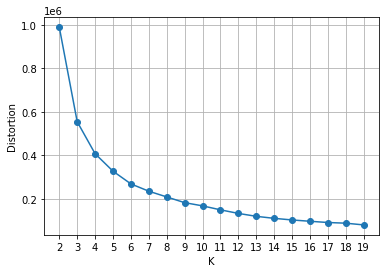

In [ ]:
plt.plot(range(2,20), distortions, marker='o')
plt.xticks(range(2, 20))
plt.xlabel('K')
plt.ylabel('Distortion')
plt.grid(True)
plt.show()

La gráfica siempre será decreciente ya que cuanto más aumentemos el número de grupos lógicamente la dispersión intra-clúster se irá reduciendo, por tanto, es difícil saber el número exacto de grupos a tomar con este método.

Se suele elegir el número que a partir de él la gráfica deja de reducir bruscamente, en este caso se podría tomar K= 4. 

El segundo método es el coeficiente de la silueta.

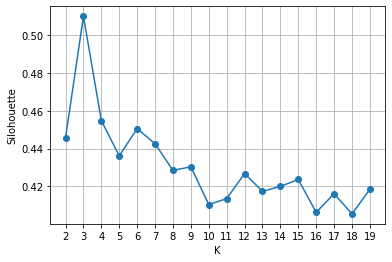

In [ ]:
plt.plot(range(2,20), silhouettes , marker='o')
plt.xticks(range(2, 20))
plt.xlabel('K')
plt.ylabel('Silohouette')
plt.grid(True)
plt.show()

Nos muestra en el eje X el número de grupos y en el eje Y el resultado del coeficiente de la silueta para dicho número de grupos. Este coeficiente evalúa la calidad de las agrupaciones producidas por los algoritmos. Devuelve un valor entre 0 y 1, siendo un valor cercano al 1 grupos bien compactos y un valor cercano al 0 grupos más dispersos. Por tanto, se toma el valor más cercano a 1, en este caso K=3. No es de sorprender este resultado, ya que en el algoritmo jerárquico se obtuvo el mismo resultado al aplicar el dendrograma. 


Se van a tomar los valores de 4, 10 y 20, ya que cuantos más grupos se tengan,  más diferencia de precios habrá entre ellos.

k= 4

In [ ]:
kmeans=KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(data)

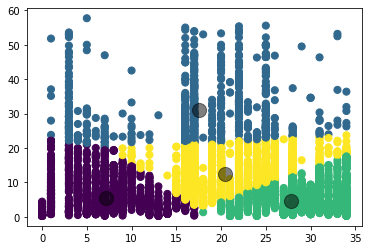

In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=clusters, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Como ocurría con el método anterior, si tomamos únicamente 4 grupos, obtendremos precios demasiados altos.

k= 10

In [ ]:
kmeans=KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(data)

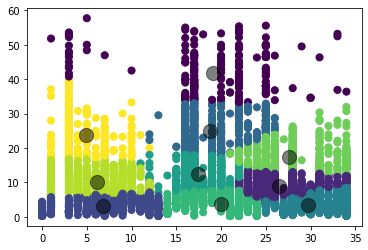

In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=clusters, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Al tomar 10 grupos, observamos que ya existen conjuntos con precios más económicos.

k= 20

In [ ]:
kmeans=KMeans(n_clusters=20, random_state=0)
clusters = kmeans.fit_predict(data)

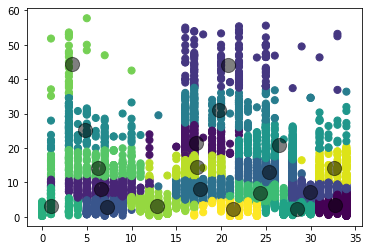

In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=clusters, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Al tomar 20 grupos se obtienen, a simple vista, mejores resultados.

In [ ]:
b=kmeans.labels_

In [ ]:
kilogramos['cluster_kmeans']=b

In [ ]:
kilogramos

,url,supermarket,category,name,price,reference_price,reference_unit,insert_date,product_id,cluster_kmeans
0,https://www.carrefour.es/supermercado/bebida-d...,carrefour-es,30,Bebida de arroz calcio sin azúcar añadido Carr...,0.99,0.99,0,2022-06-15 00:00:00,b0b6a8013d5b9c671be2c01f98f6cb7d,11
1,https://www.dia.es/compra-online/bebidas/aguas...,dia-es,0,BEZOYA agua mineral natural botella 8 lt,3.19,0.40,0,2022-06-15 00:00:00,53eb5e32ba6658c972d9797562e32969,12
2,https://www.carrefour.es/supermercado/petit-de...,carrefour-es,29,Petit de fresa Clesa sin lactosa pack de 6 uni...,1.29,2.58,1,2022-06-15 00:00:00,dcdefca90fdcc4c5a0020e59c801615d,11
3,https://www.carrefour.es/supermercado/pudding-...,carrefour-es,29,Pudding de proteínas sabor vainilla sin azúcar...,1.17,7.80,1,2022-06-15 00:00:00,449e0426ccc719dc8b3a117543798ce9,4
4,https://www.carrefour.es/supermercado/esparrag...,carrefour-es,7,Espárragos blancos cortos medios 10/18 Carrefo...,1.30,11.82,1,2022-06-15 00:00:00,85b5d9303e40434e2b2cc4a4151094f9,14
...,...,...,...,...,...,...,...,...,...,...
11434,https://www.carrefour.es/supermercado/agua-min...,carrefour-es,0,Agua mineral con gas Perrier 1 l.,1.37,1.37,0,2022-08-15 00:00:00,fe8c15a29ab05cbff5db8b4901c05257,12
11435,https://www.carrefour.es/supermercado/agua-min...,carrefour-es,0,Agua mineral con gas Font Vella 1 l.,1.07,1.07,0,2022-08-15 00:00:00,19fb996e97108e0f42538105e7295e16,12
11436,https://www.carrefour.es/supermercado/agua-min...,carrefour-es,0,"Agua mineral con gas Vichy Catalán natural 1,2 l.",1.61,1.34,0,2022-08-15 00:00:00,41aa54c68da49d82a9c52b132e454878,12
11437,https://www.carrefour.es/supermercado/agua-min...,carrefour-es,0,Agua mineral con gas Vichy Catalán natural 1 l.,1.29,1.29,0,2022-08-15 00:00:00,68bf6ab77715d1cb568ff94a94aff949,12


Comprobamos cuál de los 20 grupos ha seleccionado los productos con menor precio

**GRUPO 0**

In [ ]:
grupo0=kilogramos[(kilogramos['cluster_kmeans'] ==  0)]
grupo0['reference_price'].describe()

count    591.000000
mean       3.300242
std        1.611366
min        0.270000
25%        1.990000
50%        3.304000
75%        4.480000
max        7.110000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo0['category'])

array([34, 31, 33, 32])

**GRUPO 1**

In [ ]:
grupo1=kilogramos[(kilogramos['cluster_kmeans'] ==  1)]
grupo1['reference_price'].describe()

count    365.000000
mean      21.574636
std        2.398264
min       17.930000
25%       19.750000
50%       21.230000
75%       23.500000
max       26.667000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo1['category'])

array([20, 16, 22, 17, 19, 15, 21, 12, 18])

**GRUPO 2**

In [ ]:
grupo2=kilogramos[(kilogramos['cluster_kmeans'] ==  2)]
grupo2['reference_price'].describe()

count    567.000000
mean       8.012388
std        1.584734
min        5.264000
25%        6.615000
50%        7.920000
75%        9.406000
max       11.200000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo2['category'])

array([ 4,  9,  7,  5,  6,  8,  1, 10, 12, 11,  3])

**GRUPO 3**

In [ ]:
grupo3=kilogramos[(kilogramos['cluster_kmeans'] ==  3)]
grupo3['reference_price'].describe()

count    140.000000
mean      44.136321
std        5.063740
min       36.875000
25%       39.746000
50%       43.615500
75%       47.123250
max       55.560000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo3['category'])

array([16, 20, 17, 25, 22, 26, 28, 29, 33, 18, 24, 21, 31])

**GRUPO 4**

In [ ]:
grupo4=kilogramos[(kilogramos['cluster_kmeans'] ==  4)]
grupo4['reference_price'].describe()

count    953.000000
mean       7.098962
std        1.549152
min        4.475000
25%        5.715000
50%        6.990000
75%        8.286000
max       10.640000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo4['category'])

array([29, 31, 28, 30, 34, 33, 32])

**GRUPO 5**

In [ ]:
grupo5=kilogramos[(kilogramos['cluster_kmeans'] ==  5)]
grupo5['reference_price'].describe()

count    1075.000000
mean        2.826745
std         1.262735
min         0.309000
25%         1.760000
50%         2.700000
75%         3.807500
max         5.667000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo5['category'])

array([ 6,  7,  9,  8,  5, 10])

**GRUPO 6**

In [ ]:
grupo6=kilogramos[(kilogramos['cluster_kmeans'] ==  6)]
grupo6['reference_price'].describe()

count    690.000000
mean      12.873629
std        1.831519
min        9.920000
25%       11.322500
50%       12.600000
75%       14.390000
max       17.250000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo6['category'])

array([24, 25, 26, 28, 23, 22, 29])

**GRUPO 7**

In [ ]:
grupo7=kilogramos[(kilogramos['cluster_kmeans'] ==  7)]
grupo7['reference_price'].describe()

count    934.000000
mean       8.103535
std        1.738756
min        3.934000
25%        6.752500
50%        8.000000
75%        9.500000
max       11.324000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo7['category'])

array([20, 16, 17, 18, 15, 19, 21, 13])

**GRUPO 8**

In [ ]:
grupo8=kilogramos[(kilogramos['cluster_kmeans'] ==  8)]
grupo8['reference_price'].describe()

count    266.000000
mean      31.037500
std        2.827422
min       25.782000
25%       28.927500
50%       30.670000
75%       33.173000
max       37.560000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo8['category'])

array([20, 16, 25, 22, 17, 19, 26, 23, 30, 21, 34, 24, 13])

**GRUPO 9**

In [ ]:
grupo9=kilogramos[(kilogramos['cluster_kmeans'] ==  9)]
grupo9['reference_price'].describe()

count    123.000000
mean      25.347244
std        3.811920
min       19.750000
25%       22.300000
50%       24.250000
75%       27.710000
max       34.750000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo9['category'])

array([ 4,  5, 10,  3,  9,  6,  1,  7,  8, 11])

**GRUPO 10**

In [ ]:
grupo10=kilogramos[(kilogramos['cluster_kmeans'] ==  10)]
grupo10['reference_price'].describe()

count    348.000000
mean      20.731776
std        3.030569
min       16.560000
25%       18.362500
50%       19.970000
75%       22.670000
max       31.920000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo10['category'])

array([28, 31, 25, 26, 34, 23, 24, 32, 22, 27, 33])

**GRUPO 11**

In [ ]:
grupo11=kilogramos[(kilogramos['cluster_kmeans'] ==  11)]
grupo11['reference_price'].describe()

count    1619.00000
mean        2.35462
std         1.10699
min         0.45000
25%         1.41000
50%         2.20000
75%         3.11500
max         5.07000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo11['category'])

array([30, 29, 27, 28, 25, 26])

**GRUPO 12**

In [ ]:
grupo12=kilogramos[(kilogramos['cluster_kmeans'] ==  12)]
grupo12['reference_price'].describe()

count    334.000000
mean       3.085171
std        2.368563
min        0.240000
25%        0.875000
50%        2.840500
75%        4.729250
max        8.580000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo12['category'])

array([0, 1, 4, 3])

**GRUPO 13**

In [ ]:
grupo13=kilogramos[(kilogramos['cluster_kmeans'] ==  13)]
grupo13['reference_price'].describe()

count    914.000000
mean       7.043659
std        1.675663
min        3.500000
25%        5.639250
50%        7.000000
75%        8.360000
max       10.268000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo13['category'])

array([25, 26, 24, 23, 22, 27, 21])

**GRUPO 14**

In [ ]:
grupo14=kilogramos[(kilogramos['cluster_kmeans'] ==  14)]
grupo14['reference_price'].describe()

count    310.000000
mean      14.259484
std        2.331359
min       10.890000
25%       12.400000
50%       13.847000
75%       15.727000
max       19.950000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo14['category'])

array([ 7, 11,  9, 10,  6,  3,  4,  1,  5,  8])

**GRUPO 15**

In [ ]:
grupo15=kilogramos[(kilogramos['cluster_kmeans'] ==  15)]
grupo15['reference_price'].describe()

count    29.000000
mean     44.417241
std       6.514909
min      35.120000
25%      38.570000
50%      43.750000
75%      49.750000
max      57.700000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo15['category'])

array([ 1,  3, 10,  7,  5])

**GRUPO 16**

In [ ]:
grupo16=kilogramos[(kilogramos['cluster_kmeans'] ==  16)]
grupo16['reference_price'].describe()

count    458.000000
mean       3.149314
std        1.793207
min        0.240000
25%        1.692500
50%        2.900000
75%        4.180000
max        8.360000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo16['category'])

array([11, 12, 13, 15, 17, 16, 10, 14])

**GRUPO 17**

In [ ]:
grupo17=kilogramos[(kilogramos['cluster_kmeans'] ==  17)]
grupo17['reference_price'].describe()

count    718.000000
mean      14.367013
std        1.909209
min       11.240000
25%       12.690750
50%       14.395000
75%       15.948250
max       17.950000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo17['category'])

array([20, 16, 17, 18, 15, 19, 12, 14])

**GRUPO 18**

In [ ]:
grupo18=kilogramos[(kilogramos['cluster_kmeans'] ==  18)]
grupo18['reference_price'].describe()

count    212.000000
mean      14.072807
std        2.731498
min        9.900000
25%       11.806000
50%       13.955000
75%       16.232500
max       20.450000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo18['category'])

array([31, 34, 33, 32, 29])

**GRUPO 19**

In [ ]:
grupo19=kilogramos[(kilogramos['cluster_kmeans'] ==  19)]
grupo19['reference_price'].describe()

count    793.000000
mean       2.175855
std        1.348491
min        0.240000
25%        0.970000
50%        2.060000
75%        3.180000
max        5.400000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo19['category'])

array([20, 21, 24, 19, 22, 23, 17, 18])

Observando tanto la gráfica como la descripción de cada grupo, se han obtenido los precios más económicos de cada categoría en los siguientes grupos.

* GRUPO 0. Categorías: 31,32,33,34
* GRUPO 5. Categorías: 5,6,7,8,9,10
* GRUPO 11. Categorías: 25,26,27,28,29,30
* GRUPO 12. Categorías: 0,1,3,4
* GRUPO 16. Categorías: 11,12,13,14,15,16
* GRUPO 19: Categoría: 17,18,19,20,21,22,23,24

**TOMAMOS UNA LISTA DE LA COMPRA AL AZAR** para observar el precio obtenido. Esta lista será tomada según las recomendaciones de los especialistas.

CATEGORIA	CONSUMO AL MES
* Frutas 	90 raciones (mínimo 3 raciones al día)
* Verduras y hortalizas	60 raciones (mínimo 2 raciones al día)
* Cereales integrales o de grano entero	30-60 raciones (1-2 porciones al día)
* Frutos secos	900 gramos (30 gramos diarios)
* Legumbres	8-12 raciones (2-3 raciones a la semana)
* Aceite de oliva virgen o virgen extra	300-600 mililitros (10-20 mililitros al día)
* Huevos 	12-20 unidades (3-5 unidades a la semana)
* Leche y productos lácteos	60-160 raciones (2-4 raciones al día)
* Pescado y marisco	4-12 raciones (2-3 raciones a la semana)
* Carnes blancas	30 raciones (1 ración diaria)
* Carnes rojas	4 raciones (1 ración semanal)
* Ultraprocesados (alimentos ricos en azúcar, sal, grasa de mala calidad, potenciadores del sabor, harinas refinadas y componentes especialmente nocivos. )	No se recomienda, cuanto menos se consuman mejor para la salud. 

**FRUTA**

In [ ]:
fruta=grupo5[(grupo5['category']==6)]

In [ ]:
preciofruta=fruta.sample(n = 20, replace=True, random_state=5)
preciofruta.sum()

url                https://www.dia.es/compra-online/frescos/fruta...
supermarket        dia-escarrefour-escarrefour-esmercadona-esdia-...
category                                                         120
name               Naranja premium bolsa 2 KgKiwi Zespri 1 kg apr...
price                                                          42.32
reference_price                                                61.91
reference_unit                                                    19
insert_date        2022-08-15 00:00:002022-08-15 00:00:002022-08-...
product_id         4628039b718c0531321eaed8fc9457bea656cd7561a28b...
cluster_kmeans                                                   100
dtype: object

In [ ]:
preciofruta

,url,supermarket,category,name,price,reference_price,reference_unit,insert_date,product_id,cluster_kmeans
5265,https://www.dia.es/compra-online/frescos/fruta...,dia-es,6,Naranja premium bolsa 2 Kg,2.99,1.50,1,2022-08-15 00:00:00,4628039b718c0531321eaed8fc9457be,5
9314,https://www.carrefour.es/supermercado/kiwi-zes...,carrefour-es,6,Kiwi Zespri 1 kg aprox,3.69,3.69,1,2022-08-15 00:00:00,a656cd7561a28b25a5f38ec48f073ce6,5
7985,https://www.carrefour.es/supermercado/lima-car...,carrefour-es,6,Lima Carrefour 300 g,1.00,3.33,1,2022-08-15 00:00:00,e29635e3fd5ace9fe46d7de4c586dc66,5
10639,https://tienda.mercadona.es/product/3425/necta...,mercadona-es,6,Nectarinas mini,2.39,2.39,1,2022-08-15 00:00:00,57bff22438b12272070fc553423dc6ee,5
5457,https://www.dia.es/compra-online/frescos/fruta...,dia-es,6,Paraguaya unidad (160 gr aprox.),0.46,2.85,1,2022-08-15 00:00:00,17eea42c85b023c1567ee9091bcf45bc,5
7080,https://tienda.mercadona.es/product/5425/media...,mercadona-es,6,Media piña,1.55,1.55,1,2022-08-15 00:00:00,0aca54c226d04b4e43926c5b21bd98b8,5
2364,https://www.carrefour.es/supermercado/manzana-...,carrefour-es,6,Manzana royal gala ecológica bandeja 750 g,3.29,4.39,1,2022-08-12 00:00:00,b5e5f419fe792e52d9f570d63060f8c3,5
387,https://www.carrefour.es/supermercado/albarico...,carrefour-es,6,Albaricoque a granel 1 kg aprox,3.59,3.59,1,2022-06-24 00:00:00,ff1c020afef3d7026428196902af611d,5
10636,https://tienda.mercadona.es/product/3649/cirue...,mercadona-es,6,Ciruela amarilla,0.33,3.29,1,2022-08-15 00:00:00,04a5826af7e82e5088bad28809eee852,5
10640,https://tienda.mercadona.es/product/3772/cirue...,mercadona-es,6,Ciruelas rojas mini,1.35,2.69,1,2022-08-15 00:00:00,1b75ca447287f9649b85d045164a9f77,5


**CEREALES**

In [ ]:
cereales=grupo5[(grupo5['category']==8) | (grupo5['category']==9)]

In [ ]:
preciocereales=cereales.sample(n = 8, replace=True, random_state=2)
preciocereales.sum()

url                   https://tienda.mercadona.es/product/22278/quin...
supermarket           mercadona-escarrefour-esdia-escarrefour-esmerc...
category                                                             66
name                  Quinoa cocida blanca y roja SabrozTortiglioni ...
price                                                             12.17
reference_price                                                   26.93
reference_unit                                                        9
insert_date           2022-08-15 00:00:002022-07-13 00:00:002022-08-...
product_id            9430e3f764baf0eb3493e05873f2dc809d716e4f98b7c6...
cluster_jerarquico                                                  152
cluster_kmeans                                                       40
dtype: object

**VERDURAS Y HORTALIZAS**

In [ ]:
verdura=grupo5[(grupo5['category']==7)]

In [ ]:
precioVerdura=verdura.sample(n = 25, replace=True, random_state=3)
precioVerdura.sum()

url                   https://www.carrefour.es/supermercado/crema-de...
supermarket           carrefour-esdia-esmercadona-esdia-esdia-esmerc...
category                                                            175
name                  Crema de verduras 485 mlTomate ensalada unidad...
price                                                             39.62
reference_price                                                  78.973
reference_unit                                                       24
insert_date           2022-08-15 00:00:002022-08-15 00:00:002022-08-...
product_id            23493780c81b844870ffcc75f99e884e8ab8b211f58f04...
cluster_jerarquico                                                  331
cluster_kmeans                                                      125
dtype: object

**FRUTOS SECOS**

In [ ]:
frutos_secos=grupo5[(grupo5['category']==10)]

In [ ]:
preciofrutos=frutos_secos.sample(n = 5, replace=True, random_state=3)
preciofrutos.sum()

url                   https://www.carrefour.es/supermercado/maiz-fri...
supermarket           carrefour-escarrefour-escarrefour-escarrefour-...
category                                                             50
name                  Maíz frito XL Grefusa-Mister Corn 85 g.Maíz fr...
price                                                               8.4
reference_price                                                     9.9
reference_unit                                                        5
insert_date           2022-06-25 00:00:002022-06-25 00:00:002022-06-...
product_id            efd4503d3ff77817e5823ff875f6f6ddefd4503d3ff778...
cluster_jerarquico                                                   95
cluster_kmeans                                                       25
dtype: object

**LEGUMBRES**

In [ ]:
legumbres=grupo16[(grupo16['category']==11)]

In [ ]:
preciolegumbres=legumbres.sample(n = 2, replace=True, random_state=8)
preciolegumbres.sum()

url                   https://www.carrefour.es/supermercado/quinoa-b...
supermarket                                          carrefour-esdia-es
category                                                             22
name                  Quinoa blanca ecológica Carrefour Bio 400 g.LA...
price                                                               6.4
reference_price                                                    9.62
reference_unit                                                        2
insert_date                      2022-08-15 00:00:002022-08-15 00:00:00
product_id            d4224990c87a41345caa59131dea69dc11f5c4cc2e356f...
cluster_jerarquico                                                   19
cluster_kmeans                                                       32
dtype: object

**HUEVOS**

In [ ]:
huevos=grupo16[(grupo16['category']==13)]

In [ ]:
preciohuevos=huevos.sample(n = 3, replace=True, random_state=2)
preciohuevos.sum()

url                   https://tienda.mercadona.es/product/31540/huev...
supermarket                              mercadona-esdia-escarrefour-es
category                                                             39
name                  Huevos grandes LHuevos frescos categoría A cla...
price                                                              6.34
reference_price                                                    6.33
reference_unit                                                        8
insert_date           2022-08-15 00:00:002022-08-15 00:00:002022-08-...
product_id            54304b5870c73b76636c8a91abc91718bd1ad3b25a03db...
cluster_jerarquico                                                   54
cluster_kmeans                                                       48
dtype: object

**LACTEOS**

In [ ]:
lacteos=grupo16[(grupo16['category']==14) | (grupo16['category']==15) | (grupo16['category']==16)]

In [ ]:
preciolacteos=lacteos.sample(n = 22, replace=True, random_state=2)
preciolacteos.sum()

url                   https://www.carrefour.es/supermercado/leche-se...
supermarket           carrefour-escarrefour-esdia-esdia-esdia-esdia-...
category                                                            323
name                  Leche semidesnatada Central Lechera Asturiana ...
price                                                              48.1
reference_price                                                  56.707
reference_unit                                                        8
insert_date           2022-08-15 00:00:002022-07-27 00:00:002022-08-...
product_id            3eb10030ceda1bd6b31ec030341ae3d217b31515d8bfe0...
cluster_jerarquico                                                  229
cluster_kmeans                                                      352
dtype: object

**PESCADO**

In [ ]:
pescado=grupo19[(grupo19['category']==17)]

In [ ]:
preciopescado=pescado.sample(n = 5, replace=True, random_state=1)
preciopescado.sum()

url                   https://www.carrefour.es/supermercado/tinta-de...
supermarket           carrefour-escarrefour-escarrefour-escarrefour-...
category                                                             85
name                  Tinta de sepia congelada 2 ud de 4 gSardinas s...
price                                                              1.93
reference_price                                                    1.93
reference_unit                                                       10
insert_date           2022-08-15 00:00:002022-07-01 00:00:002022-07-...
product_id            3645cf9fa2fa4db7c69d1cbbdc18f938dabd42ff90375c...
cluster_jerarquico                                                   15
cluster_kmeans                                                       95
dtype: object

**CARNE BLANCA**

In [ ]:
blanca=grupo19[(grupo19['category']==18)]

In [ ]:
precioblanca=blanca.sample(n = 7, replace=True, random_state=3)
precioblanca.sum()

url                   https://www.carrefour.es/supermercado/contramu...
supermarket           carrefour-esmercadona-esmercadona-escarrefour-...
category                                                            126
name                  Contramuslo de pollo Carrefour 1,2 kg aproxPat...
price                                                             28.56
reference_price                                                   27.05
reference_unit                                                        7
insert_date           2022-08-15 00:00:002022-08-15 00:00:002022-08-...
product_id            6f39170b366f8c3c60b1da95f0b60b36b003ac809a5bb8...
cluster_jerarquico                                                   21
cluster_kmeans                                                      133
dtype: object

**CARNE ROJA**

In [ ]:
roja=grupo19[(grupo19['category']==19)]

In [ ]:
precioroja=roja.sample(n = 2, replace=True, random_state=3)
precioroja.sum()

url                   https://www.dia.es/compra-online/frescos/carne...
supermarket                                          dia-esmercadona-es
category                                                             38
name                  SELECCIÓN DE DIA morcilla de Burgos pieza 300 ...
price                                                              5.44
reference_price                                                    9.13
reference_unit                                                        2
insert_date                      2022-08-15 00:00:002022-08-15 00:00:00
product_id            ba0f84f3b84ebe55fb54f5132921479fe1c8ba494ce1d1...
cluster_jerarquico                                                    6
cluster_kmeans                                                       38
dtype: object

**ULTRAPROCESADOS**

In [ ]:
ultra1=grupo11[(grupo11['category']==29)]
ultra2=grupo0[(grupo0['category']==31) | (grupo0['category']==34)]

In [ ]:
ultra=pd.concat([ultra1, ultra2])

In [ ]:
precioultra=ultra.sample(n =1, replace=True, random_state=2)
precioultra.sum()

url                   https://tienda.mercadona.es/product/68029/peti...
supermarket                                                mercadona-es
category                                                             29
name                                               Petit Nesquik Nestlé
price                                                              1.45
reference_price                                                   4.028
reference_unit                                                        1
insert_date                                         2022-08-15 00:00:00
product_id                             6300331d722c7e82ff5c89290e318535
cluster_jerarquico                                                    2
cluster_kmeans                                                       11
dtype: object

In [ ]:
42.32+12.17+39.62+8.4+6.4+6.34+48.1+1.93+28.56+5.44+4.028

203.30800000000002

**COMPRA FINAL MENSUAL CON UN PRECIO DE**
203

### Métodos basados en densidad

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [ ]:
from sklearn.preprocessing import StandardScaler

Para este método, lo principal es siempre es normalizar (las variables estén entre 0 y 1) o escandalizar (para que todas tengan la misma varianza) para que el algoritmo puedan ir bien. 

In [ ]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(data)

In [ ]:
X_scaled

array([[ 1.07959913, -0.93507561],
       [-2.20441481, -1.00718098],
       [ 0.970132  , -0.74075777],
       ...,
       [-2.20441481, -0.89230125],
       [-2.20441481, -0.89841187],
       [-2.20441481, -1.0035146 ]])

Visualizamos el resultado

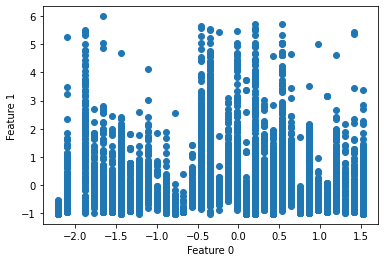

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Observamos que la gráfica es idéntica, sin en cambio, los valores de los ejes han cambiado.

Se aplica el método.

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.123, min_samples=2) #Se realiza prueba y error hasta obtner buenos resultados
clusters = dbscan.fit_predict(X_scaled) 

Se visualiza

Text(0, 0.5, 'Feature 1')

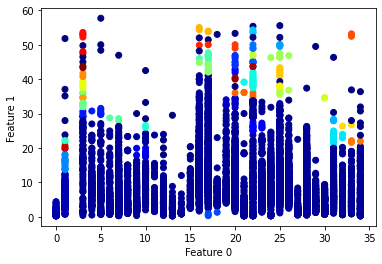

In [ ]:
# plot the cluster assignments
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='jet')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Si se tiene en cuenta el objetivo del proyecto, se obtienen resultados bastante malos.

SE CAMBIAN LOS PARÁMETROS

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=3) #Se realiza prueba y error hasta obtner buenos resultados
clusters = dbscan.fit_predict(X_scaled) 

Lo visualizamos

Text(0, 0.5, 'Feature 1')

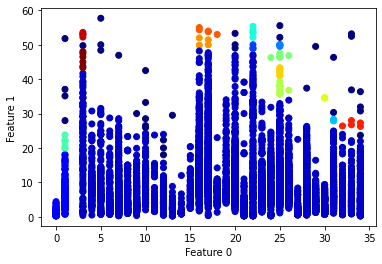

In [ ]:
# plot the cluster assignments
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='jet')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

SE CAMBIAN LOS PARÁMETROS

In [ ]:
dbscan = DBSCAN(eps=0.25, min_samples=4) #Se realiza prueba y error hasta obtner buenos resultados
clusters = dbscan.fit_predict(X_scaled) 

Lo visualizamos

Text(0, 0.5, 'Feature 1')

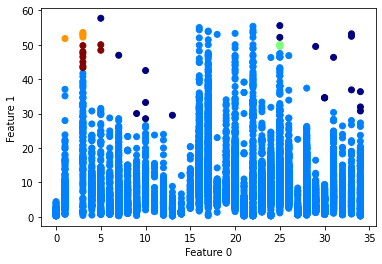

In [ ]:
# plot the cluster assignments
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='jet')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Por mucho que se han modificado los parámetros, no se ha conseguido, con este método, buenos resultados.

Por tanto, este método se descarta de cara al proyecto.

### Método mean shift

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
#from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from itertools import cycle
from PIL import Image

Antes de aplicar el método, se estima el ancho de banda de la Gaussiana que va a ponderar los elementos dentro de un radio, y se va a indicar como parámetro en Mean Shift


In [ ]:
# vamos a calcular el ancho de banda "h" automáticamente
bandwidth = estimate_bandwidth(data, quantile=.1, n_samples=500) 
print(f'Ancho de banda estimado: {bandwidth}')

Ancho de banda estimado: 5.726255513380609


Se aplica Mean Shift con el ancho de banda "recomendado" por el algoritmo.

In [ ]:
# aplicamos el mean shift

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(data)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = labels.max()+1


Se muestra gráficamente el resultado


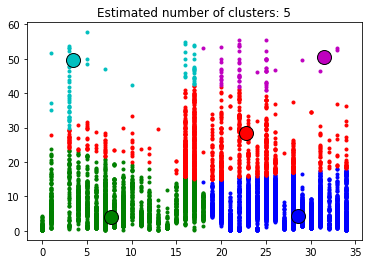

In [ ]:
#%% Plot result
plt.figure(1)
plt.clf()
 
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(data[my_members, 0], data[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1],
             'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Aplicando en ancho de la Gaussiana estimado con código, se obtendrían 6 grupos. Si se toman los conjuntos con menor precio, y, los supuestamente más económicos, se tendrían precios demasiado elevados. 

Por tanto, para solucionar lo anteriormente dicho, se ha modificado el ancho de la Gaussiana. Después de diferentes pruebas y bastantes modificaciones del ancho de la Gaussiana, se han obtenido los mejores resultados con los siguientes datos:

In [ ]:
# aplicamos el mean shift

ms = MeanShift(bandwidth=2.5, bin_seeding=True)
ms.fit(data)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = labels.max()+1

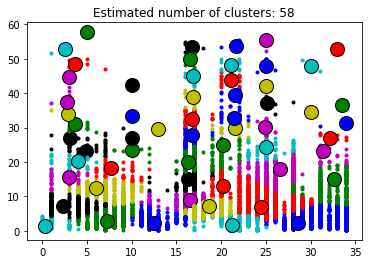

In [ ]:
#%% Plot result
plt.figure(1)
plt.clf()
 
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(data[my_members, 0], data[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1],
             'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Tomando un ancho de 2.5 en la Gaussiana, se encuentran precios más o menos asequibles. Sin embargo, el problema obtenido es que se forman 58 grupos. A simple vista, los grupos que tienen precios más económicos en cada categoría, no mejoran notablemente los valores obtenidos con K-means o el algoritmo jerárquico. Por tanto, este método debería quedar descalificado, sin embargo, se van a localizar los grupos con mejores resultados y a obtener por cuanto saldría la compra final.

In [ ]:
labels[0:100]

array([ 0, 10,  0,  2, 12,  9,  9,  5,  9, 22,  9,  9,  5,  9,  9,  9,  5,
       19, 23,  8,  8,  8,  6,  8,  6, 16, 26,  8, 13,  9,  5,  5,  9, 21,
        5, 22, 22,  3, 23, 14,  4,  6,  8, 14,  6,  8, 16,  8,  8, 16, 14,
        4,  8,  8,  6,  5,  1,  4,  4,  9,  0, 13,  2, 17,  8, 12,  6,  4,
        0,  6,  4,  4,  4,  7, 26,  8,  8,  8,  6,  5,  3,  9,  8,  6,  5,
        6,  9,  9,  4,  2, 15, 15, 15, 15,  5,  6,  6,  4,  8,  6])

In [ ]:
b=labels

In [ ]:
kilogramos['cluster_mean_shift']=b

**Buscamos los grupos más económicos**

**GRUPO 0**

In [ ]:
grupo0=kilogramos[(kilogramos['cluster_mean_shift'] ==  0)]
grupo0['reference_price'].describe()

count    2733.00000
mean        3.29162
std         1.88954
min         0.27000
25%         1.78000
50%         2.90000
75%         4.66000
max         8.50000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo0['category'])

array([30, 29, 27, 34, 31, 28, 33, 32, 26, 25])

**GRUPO 1**

In [ ]:
grupo1=kilogramos[(kilogramos['cluster_mean_shift'] ==  1)]
grupo1['reference_price'].describe()

count    1264.000000
mean        3.311336
std         1.707277
min         0.309000
25%         1.890000
50%         3.025500
75%         4.400000
max         8.000000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo1['category'])

array([ 6,  7,  9,  8,  5,  4, 10])

**GRUPO 7**

In [ ]:
grupo7=kilogramos[(kilogramos['cluster_mean_shift'] ==  7)]
grupo7['reference_price'].describe()

count    413.000000
mean       2.891855
std        1.609887
min        0.240000
25%        1.600000
50%        2.700000
75%        3.900000
max        7.400000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo7['category'])

array([11, 12, 13, 10, 15, 16, 14])

**GRUPO 3**

In [ ]:
grupo3=kilogramos[(kilogramos['cluster_mean_shift'] ==  3)]
grupo3['reference_price'].describe()

count    726.000000
mean       1.942700
std        1.164879
min        0.240000
25%        0.945000
50%        1.895000
75%        2.800000
max        5.000000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo3['category'])

array([20, 21, 24, 22, 17, 23, 18, 19, 25])

**GRUPO 10**

In [ ]:
grupo10=kilogramos[(kilogramos['cluster_mean_shift'] ==  10)]
grupo10['reference_price'].describe()

count    218.000000
mean       1.697541
std        1.303668
min        0.240000
25%        0.467500
50%        1.290000
75%        2.837500
max        4.394000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo10['category'])

array([0, 1, 3, 4])

Observando tanto la gráfica como la descripción de cada grupo, se han obtenido los precios más económicos para cada categoría en los siguientes grupos:

* GRUPO 10. Categorías: 0,1,3,4
* GRUPO 1. Categorías: 5,6,7,8,9
* GRUPO 7. Categorías: 10,11,12,13,14,15,16
* GRUPO 3. Categorías: 17,18,19,20,21,22,23,24,25
* GRUPO 0. Categorías: 26,27,28,29,30,31,32,33,34

**TOMAMOS UNA LISTA DE LA COMPRA AL AZAR** para observar el precio obtenido. Esta lista será tomada según las recomendaciones de los especialistas.

CATEGORIA	CONSUMO AL MES
* Frutas 	90 raciones (mínimo 3 raciones al día)
* Verduras y hortalizas	60 raciones (mínimo 2 raciones al día)
* Cereales integrales o de grano entero	30-60 raciones (1-2 porciones al día)
* Frutos secos	900 gramos (30 gramos diarios)
* Legumbres	8-12 raciones (2-3 raciones a la semana)
* Aceite de oliva virgen o virgen extra	300-600 mililitros (10-20 mililitros al día)
* Huevos 	12-20 unidades (3-5 unidades a la semana)
* Leche y productos lácteos	60-160 raciones (2-4 raciones al día)
* Pescado y marisco	4-12 raciones (2-3 raciones a la semana)
* Carnes blancas	30 raciones (1 ración diaria)
* Carnes rojas	4 raciones (1 ración semanal)
* Ultraprocesados (alimentos ricos en azúcar, sal, grasa de mala calidad, potenciadores del sabor, harinas refinadas y componentes especialmente nocivos. )	No se recomienda, cuanto menos se consuman mejor para la salud. 
3 raciones al mes.


**FRUTA**

In [ ]:
fruta=grupo1[(grupo1['category']==6)]

In [ ]:
preciofruta=fruta.sample(n = 20, replace=True, random_state=5)
preciofruta.sum()

url                   https://www.dia.es/compra-online/frescos/fruta...
supermarket           dia-escarrefour-esmercadona-escarrefour-esdia-...
category                                                            120
name                  Mango unidad (850 gr aprox.)Banana a granel 1 ...
price                                                             55.14
reference_price                                                   48.48
reference_unit                                                       21
insert_date           2022-08-15 00:00:002022-08-15 00:00:002022-08-...
product_id            3f25b189ea09f77574f67967d19119f5f043173663b06d...
cluster_jerarquico                                                  344
cluster_kmeans                                                       94
cluster_mean_shift                                                   20
dtype: object

**CEREALES**

In [ ]:
cereales=grupo1[(grupo1['category']==8) | (grupo1['category']==9)]

In [ ]:
preciocereales=cereales.sample(n = 8, replace=True, random_state=2)
preciocereales.sum()

url                   https://www.dia.es/compra-online/despensa/pan/...
supermarket           dia-esmercadona-esdia-escarrefour-esmercadona-...
category                                                             68
name                  EL MOLINO DE DIA pan de molde integral 100% bo...
price                                                             13.28
reference_price                                                  30.233
reference_unit                                                        8
insert_date           2022-08-15 00:00:002022-07-05 00:00:002022-08-...
product_id            1ee9307d502b4ae550c7d2a2024ba12c8f953ceeea357b...
cluster_jerarquico                                                  116
cluster_kmeans                                                       34
cluster_mean_shift                                                    8
dtype: object

**VERDURAS Y HORTALIZAS**

In [ ]:
verdura=grupo1[(grupo1['category']==7)]

In [ ]:
precioVerdura=verdura.sample(n = 25, replace=True, random_state=3)
precioVerdura.sum()

url                   https://www.dia.es/compra-online/frescos/verdu...
supermarket           dia-esdia-esdia-escarrefour-esdia-esdia-esdia-...
category                                                            175
name                  DIA VEGECAMPO espinacas bolsa 300 grGVTARRA tu...
price                                                             38.58
reference_price                                                  74.134
reference_unit                                                       21
insert_date           2022-08-15 00:00:002022-08-15 00:00:002022-08-...
product_id            a3cb768dab1ca8445e0fbf76c57e1ccafa10b5faba7ce2...
cluster_jerarquico                                                  385
cluster_kmeans                                                      125
cluster_mean_shift                                                   25
dtype: object

**FRUTOS SECOS**

In [ ]:
frutos_secos=grupo7[(grupo7['category']==10)]

In [ ]:
preciofrutos=frutos_secos.sample(n = 5, replace=True, random_state=3)
preciofrutos.sum()

url                   https://tienda.mercadona.es/product/34830/maiz...
supermarket           mercadona-escarrefour-escarrefour-esmercadona-...
category                                                             50
name                  Maíz palomitas Casa MayorMaíz frito XL Grefusa...
price                                                              6.72
reference_price                                                  13.884
reference_unit                                                        5
insert_date           2022-08-15 00:00:002022-06-25 00:00:002022-08-...
product_id            608052c4491251ffb5d32dc66390652fefd4503d3ff778...
cluster_jerarquico                                                   94
cluster_kmeans                                                       58
cluster_mean_shift                                                   35
dtype: object

**LEGUMBRES**

In [ ]:
legumbres=grupo7[(grupo7['category']==11)]

In [ ]:
preciolegumbres=legumbres.sample(n = 2, replace=True, random_state=8)
preciolegumbres.sum()

url                   https://www.carrefour.es/supermercado/quinoa-b...
supermarket                                          carrefour-esdia-es
category                                                             22
name                  Quinoa blanca ecológica Carrefour Bio 400 g.LA...
price                                                               6.4
reference_price                                                    9.62
reference_unit                                                        2
insert_date                      2022-08-15 00:00:002022-08-15 00:00:00
product_id            d4224990c87a41345caa59131dea69dc11f5c4cc2e356f...
cluster_jerarquico                                                   19
cluster_kmeans                                                       32
cluster_mean_shift                                                   14
dtype: object

**HUEVOS**

In [ ]:
huevos=grupo7[(grupo7['category']==13)]

In [ ]:
preciohuevos=huevos.sample(n = 3, replace=True, random_state=2)
preciohuevos.sum()

url                   https://tienda.mercadona.es/product/15768/huev...
supermarket                              mercadona-esdia-escarrefour-es
category                                                             39
name                  Huevos de gallinas camperasHuevos frescos cate...
price                                                              5.89
reference_price                                                    6.47
reference_unit                                                        8
insert_date           2022-08-15 00:00:002022-08-15 00:00:002022-08-...
product_id            d9910d14a7a3c96eb1f5bb9f789f2830bd1ad3b25a03db...
cluster_jerarquico                                                   54
cluster_kmeans                                                       48
cluster_mean_shift                                                   21
dtype: object

**LACTEOS**

In [ ]:
lacteos=grupo7[(grupo7['category']==14) | (grupo7['category']==15) | (grupo7['category']==16)]

In [ ]:
preciolacteos=lacteos.sample(n = 22, replace=True, random_state=3)
preciolacteos.sum()

url                   https://www.dia.es/compra-online/despensa/lact...
supermarket           dia-escarrefour-esdia-escarrefour-escarrefour-...
category                                                            325
name                  PASCUAL leche semidesnatada envase 1 ltMargari...
price                                                             34.63
reference_price                                                  64.414
reference_unit                                                       12
insert_date           2022-08-15 00:00:002022-08-15 00:00:002022-08-...
product_id            c1e840a5f7aaf987f9195b6fa68d4dd63cdfb048688b0f...
cluster_jerarquico                                                  199
cluster_kmeans                                                      352
cluster_mean_shift                                                  154
dtype: object

**PESCADO**

In [ ]:
pescado=grupo3[(grupo3['category']==17)]

In [ ]:
preciopescado=pescado.sample(n = 5, replace=True, random_state=1)
preciopescado.sum()

url                   https://tienda.mercadona.es/product/83327/kit-...
supermarket           mercadona-esdia-escarrefour-escarrefour-escarr...
category                                                             85
name                  Kit sushiMejillón 40/50 piezas malla (peso apr...
price                                                              6.79
reference_price                                                    6.79
reference_unit                                                        8
insert_date           2022-08-15 00:00:002022-07-31 00:00:002022-08-...
product_id            559b7dc2dddc2c0751f7e4d8913dc814fde69dc24d30ac...
cluster_jerarquico                                                   15
cluster_kmeans                                                       89
cluster_mean_shift                                                   15
dtype: object

**CARNE BLANCA**

In [ ]:
blanca=grupo3[(grupo3['category']==18)]

In [ ]:
precioblanca=blanca.sample(n = 7, replace=True, random_state=3)
precioblanca.sum()

url                   https://www.dia.es/compra-online/frescos/carne...
supermarket           dia-esmercadona-esdia-esdia-escarrefour-esmerc...
category                                                            126
name                  SELECCIÓN DE DIA cuartos traseros de pollo ban...
price                                                             21.77
reference_price                                                   21.58
reference_unit                                                        7
insert_date           2022-08-15 00:00:002022-08-15 00:00:002022-08-...
product_id            7b6883fc918287959da76dd30cc9bdb1ebdda6da01a1a9...
cluster_jerarquico                                                   21
cluster_kmeans                                                      133
cluster_mean_shift                                                   21
dtype: object

**CARNE ROJA**

In [ ]:
roja=grupo3[(grupo3['category']==19)]

In [ ]:
precioroja=roja.sample(n = 2, replace=True, random_state=3)
precioroja.sum()

url                   https://tienda.mercadona.es/product/4590/lomo-...
supermarket                                    mercadona-esmercadona-es
category                                                             38
name                             Lomo de cerdo trozoLomo de cerdo trozo
price                                                              6.32
reference_price                                                     7.9
reference_unit                                                        2
insert_date                      2022-08-15 00:00:002022-08-15 00:00:00
product_id            34a5b31bcece9ebb42b0228546806c8334a5b31bcece9e...
cluster_jerarquico                                                    6
cluster_kmeans                                                       38
cluster_mean_shift                                                    6
dtype: object

**ULTRAPROCESADOS**

In [ ]:
ultra=grupo0[(grupo0['category']==29) | (grupo0['category']==31) | (grupo0['category']==34)]

In [ ]:
precioultra=ultra.sample(n =1, replace=True, random_state=2)
precioultra.sum()

url                   https://tienda.mercadona.es/product/20406/post...
supermarket                                                mercadona-es
category                                                             29
name                         Postre de soja Hacendado natural azucarado
price                                                               1.1
reference_price                                                     2.2
reference_unit                                                        1
insert_date                                         2022-08-11 00:00:00
product_id                             3b48ab71d9e2471eab09d00493d22c81
cluster_jerarquico                                                    2
cluster_kmeans                                                       11
cluster_mean_shift                                                    0
dtype: object

In [ ]:
55.14+13.28+38.58+6.72+6.4+5.89+64.41+6.79+21.77+7.9+1.1

227.98000000000002

**COMPRA FINAL MENSUAL CON UN PRECIO DE**
228

### Expectation-Mazimitation.

El modelo de mezcla de Gaussianas trata de encontrar una mezcla de distribuciones de probabilidad Gaussianas multidimensionales que sean capaces de generar los datos con los que tratamos.

Se ejecuta el modelo generando 4 grupos, es decir, nuestros datos los intentan generar al completo 4 Gaussianas.

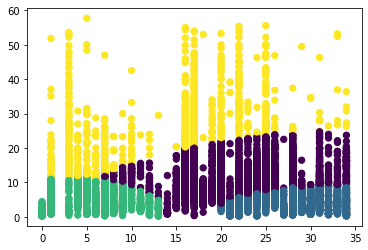

In [ ]:
from sklearn.mixture import GaussianMixture


gmm=GaussianMixture(n_components=4, random_state=1).fit(data)
labels=gmm.predict(data)  

plt.scatter(data[:, 0], data[:, 1], c=labels, s=40, cmap='viridis');

Como este algorítmo es un modelo probabilístico, ofrece tanto la posibilidad de saber a qué grupo pertenece una muestra, como con qué probabilidad pertenece a cada grupo una muestra concreta.

Esto lo podemos hacer usando la función predict_proba, que devuelve una matriz de tamaño [n_samples, n_clusters] que mide la probabilidad de cada punto de pertenecer a cada grupo:

In [ ]:
probs = gmm.predict_proba(data)  #Da la probabilidad de cada elemento de pertenecer al cluster 1, cluster 2 y cluster3
print(probs[0:10].round(4))

[[2.490e-02 9.749e-01 0.000e+00 2.000e-04]
 [7.500e-03 0.000e+00 9.293e-01 6.320e-02]
 [2.880e-02 9.711e-01 0.000e+00 2.000e-04]
 [2.905e-01 7.078e-01 0.000e+00 1.700e-03]
 [4.173e-01 0.000e+00 2.062e-01 3.764e-01]
 [8.802e-01 0.000e+00 0.000e+00 1.198e-01]
 [8.802e-01 0.000e+00 0.000e+00 1.198e-01]
 [9.463e-01 3.080e-02 1.000e-04 2.280e-02]
 [8.802e-01 0.000e+00 0.000e+00 1.198e-01]
 [1.612e-01 0.000e+00 0.000e+00 8.388e-01]]


Se observa que el elemento 0 tiene una probabilidad del 0.0249 de pertenecer al primer grupo, una probabilidad de 0.9749 de pertenecer al grupo 2, una probabilidad nula de pertenecer al grupo 3 y una probabilidad de 0.0002 de pertenecer al grupo 4.

Por tanto, los elementos que tienen aproximadamente probabilidad del 50% en 2 grupos, es porque se encuentran en la frontera de los dos conjuntos.

Esta información es realmente útil. Si le asignamos un tamaño diferente a cada punto dependiendo de la certeza de su predicción, podemos visualizar gráficos como el siguiente, donde los puntos más pequeños son los que se encuentran entre dos grupos.

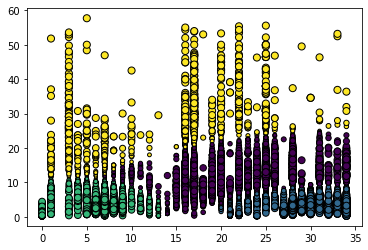

In [ ]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences. Pinta bolas grandes o pequeñas segun lo claro que tiene si esta en un cluster o no. Es decir, el tamaño da la prob de pertenecer a ese cluster. 
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=size, edgecolor='k');

Recordad que al final, este algoritmo es tremendamente similar al k-means, usa el algoritmo de esperanza-maximización:

1. Escoge unas estimaciones iniciales para la posición (μk) y la forma (∑k) de cada grupo (componente).

2. Después, repite hasta converger los siguientes pasos:

   1. Paso E: para cada elemento de nuestro conjunto de datos, encuentra unos pesos (z^ik) codifican la pertenencia de elemento punto a cada componente de nuestro algoritmo.
   2. Paso M: para cada grupo (componente), actualiza su posición, forma y tamaño, utilizando los pesos anteriores y todas las muestras del conjuto de datos para calcular π^k, μ^k y Σ^k
Y al final, cada elemento está asociado con las probabilidades de pertenecer a cada una de las componentes de nuestro GMM (grupos).

Igual que en la versión del k-means, este algoritmo es sensible a la inicialización y puede no encontrar el máximo global, quedándose atrapado en un máximo local. Por ello, en la práctica utilizamos varias ejecuciones con distintas inicializaciones.

La siguiente función permite visualizar las elipses mostrando las curvas de nivel de las gaussianas en 2D

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

    ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='*', c='w', s=300, zorder=3)

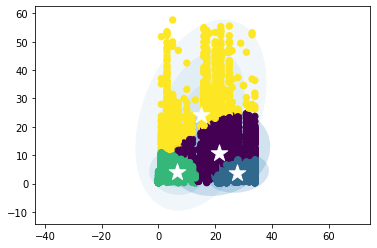

In [ ]:
gmm = GaussianMixture(n_components=4, random_state=1)
plot_gmm(gmm, data)

El hecho de que el algoritmo sea un modelo generativo nos proporciona un medio natural para determinar el número óptimo de componentes para un conjunto de datos determinado. Un modelo generativo es intrínsecamente una distribución de probabilidad para el conjunto de datos, por lo que podemos evaluar simplemente la probabilidad de los datos bajo el modelo, utilizando la validación cruzada para evitar el sobreajuste. Otra forma de corregir el sobreajuste es ajustar las probabilidades del modelo utilizando algún criterio analítico como el criterio de información de Akaike (AIC) o el criterio de información bayesiano (BIC). El estimador del algoritmo de Scikit-Learn incluye en realidad métodos incorporados que calculan ambos, por lo que es muy fácil operar con este enfoque.

Veamos el AIC y el BIC en función del número de componentes del algoritmo para nuestro conjunto de datos:


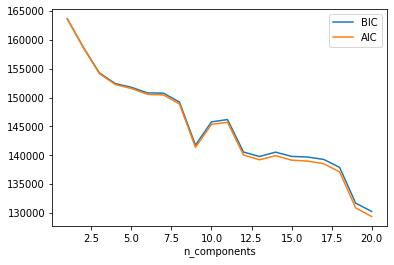

In [ ]:
n_components = np.arange(1, 21)  #Para encontrar el numero de cluster que aplicamos
models = [GaussianMixture(n).fit(data) for n in n_components]

plt.plot(n_components, [m.bic(data) for m in models], label='BIC') #Dos metodos, el Bayesian information criterion
plt.plot(n_components, [m.aic(data) for m in models], label='AIC') #Y el metodo de Akaike information criterion
plt.legend(loc='best')
plt.xlabel('n_components');

El número óptimo de conglomerados es el valor que minimiza el AIC o el BIC, dependiendo de la aproximación que queramos utilizar. El AIC nos indica que nuestra elección de 20 componentes era una buena elección. 

Normalmente el BIC recomienda un modelo más sencillo, pero en esta ocasión encontramos gráficas prácticamente iguales.

Esta elección del número de componentes mide lo bien que funciona el algoritmo como estimador de la densidad.

VOLVEMOS A REPETIR EL MODELO CON 20 COMPONENTES

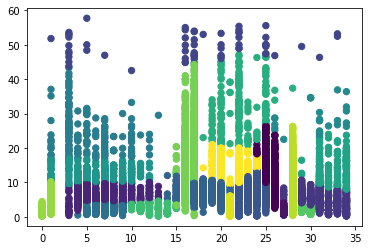

In [ ]:
gmm=GaussianMixture(n_components=20, random_state=1).fit(data)
labels=gmm.predict(data)  

plt.scatter(data[:, 0], data[:, 1], c=labels, s=40, cmap='viridis');

Al ser un método basado en la densidad, lleva a cabo agrupaciones tomando al com-pleto o casi al completo todos los alimentos de la categoría. Esto se puede ver en las categorías 16, 17 y 28. Por tanto, para dichas categorías el método no sería lo suficien-temente adecuado.


Sin embargo, para algunas categorías mostraría resultados aparentemente mejores que con los demás modelos, por ello, se va a comprobar por cuanto saldría la compra men-sual.


In [ ]:
labels[0:100]

array([14, 16, 14,  3, 10, 19, 19,  6, 19, 12, 19, 19,  6, 19, 19, 19,  6,
       12, 10, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 19,  6,  6, 19, 12,
        6, 12, 12,  6, 10, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15,  6,  7,  6,  6,  5, 14,  2,  5, 17, 19, 10, 15,  6,
        1, 15,  6,  6, 15, 13, 15, 15, 15, 15, 15,  6,  6, 19, 15, 15,  6,
       15, 19, 19, 15,  3, 11, 11, 11, 11,  6, 15, 15, 15, 15, 15])

In [ ]:
b=labels

In [ ]:
kilogramos['cluster_Gaussianas']=b

**Buscamos los grupos más económicos**

**GRUPO 0**

In [ ]:
grupo0=kilogramos[(kilogramos['cluster_Gaussianas'] ==  0)]
grupo0['reference_price'].describe()

count    778.000000
mean      12.351963
std        5.139008
min        2.455000
25%        9.000000
50%       11.800000
75%       15.000000
max       26.500000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo0['category'])

array([26, 25, 24])

**GRUPO 1**

In [ ]:
grupo1=kilogramos[(kilogramos['cluster_Gaussianas'] ==  1)]
grupo1['reference_price'].describe()

count    221.000000
mean       1.578249
std        0.769855
min        0.500000
25%        0.950000
50%        1.350000
75%        1.990000
max        4.780000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo1['category'])

array([27])

**GRUPO 2**

In [ ]:
grupo2=kilogramos[(kilogramos['cluster_Gaussianas'] ==  2)]
grupo2['reference_price'].describe()

count    783.000000
mean       6.498036
std        1.850478
min        0.380000
25%        5.000000
50%        6.339000
75%        7.920000
max       10.000000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo2['category'])

array([ 4,  7,  6,  9,  5, 12, 11,  8, 10,  3, 13])

**GRUPO 3**

In [ ]:
grupo3=kilogramos[(kilogramos['cluster_Gaussianas'] ==  3)]
grupo3['reference_price'].describe()

count    1247.000000
mean        4.860303
std         2.133946
min         0.270000
25%         3.440000
50%         4.950000
75%         6.318000
max        10.640000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo3['category'])

array([29, 34, 31, 33, 30, 32, 27])

**GRUPO 4**

In [ ]:
grupo4=kilogramos[(kilogramos['cluster_Gaussianas'] ==  4)]
grupo4['reference_price'].describe()

count    65.000000
mean     49.669338
std       3.363123
min      42.500000
25%      46.900000
50%      49.750000
75%      52.457000
max      57.700000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo4['category'])

array([ 1, 25,  3, 22, 17, 26, 20, 29, 16, 10, 33, 18,  7, 31,  5])

**GRUPO 5**

In [ ]:
grupo5=kilogramos[(kilogramos['cluster_Gaussianas'] ==  5)]
grupo5['reference_price'].describe()

count    962.000000
mean       6.175089
std        2.860444
min        0.240000
25%        4.180000
50%        6.250000
75%        8.140000
max       14.000000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo5['category'])

array([24, 25, 23, 22])

**GRUPO 6**

In [ ]:
grupo6=kilogramos[(kilogramos['cluster_Gaussianas'] ==  6)]
grupo6['reference_price'].describe()

count    732.000000
mean       7.059126
std        2.084354
min        1.300000
25%        5.645000
50%        7.181000
75%        8.760000
max       11.980000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo6['category'])

array([20, 17, 18, 15, 19, 21, 14])

**GRUPO 7**

In [ ]:
grupo7=kilogramos[(kilogramos['cluster_Gaussianas'] ==  7)]
grupo7['reference_price'].describe()

count    903.000000
mean       2.444462
std        0.984983
min        0.309000
25%        1.595000
50%        2.400000
75%        3.240000
max        4.455000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo7['category'])

array([6, 7, 8, 5, 9, 4])

**GRUPO 8**

In [ ]:
grupo8=kilogramos[(kilogramos['cluster_Gaussianas'] ==  8)]
grupo8['reference_price'].describe()

count    195.000000
mean      24.198467
std        5.836830
min       16.900000
25%       19.355000
50%       23.270000
75%       27.175000
max       43.330000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo8['category'])

array([ 9,  4,  5,  7, 10,  3,  6,  1, 12,  8, 11, 13])

**GRUPO 9**

In [ ]:
grupo9=kilogramos[(kilogramos['cluster_Gaussianas'] ==  9)]
grupo9['reference_price'].describe()

count    30.000000
mean     27.951300
std       4.111086
min      22.500000
25%      24.752500
50%      27.045000
75%      29.915000
max      36.875000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo9['category'])

array([31, 34, 30, 32, 26, 27, 33])

**GRUPO 10**

In [ ]:
grupo10=kilogramos[(kilogramos['cluster_Gaussianas'] ==  10)]
grupo10['reference_price'].describe()

count    340.000000
mean      12.693006
std        1.845008
min        9.412000
25%       11.237500
50%       12.542000
75%       14.000000
max       16.880000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo10['category'])

array([ 7, 11,  9,  5,  6, 10,  3,  4,  1, 12,  8])

**GRUPO 11**

In [ ]:
grupo11=kilogramos[(kilogramos['cluster_Gaussianas'] ==  11)]
grupo11['reference_price'].describe()

count    330.000000
mean      13.103264
std        3.665223
min        7.900000
25%       10.000000
50%       12.040000
75%       15.882500
max       23.960000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo11['category'])

array([31, 34, 29, 33, 32])

**GRUPO 12**

In [ ]:
grupo12=kilogramos[(kilogramos['cluster_Gaussianas'] ==  12)]
grupo12['reference_price'].describe()

count    257.000000
mean      31.222510
std        6.889698
min       20.625000
25%       25.834000
50%       30.000000
75%       35.830000
max       47.090000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo12['category'])

array([20, 22, 25, 19, 23, 24, 26, 28, 21, 18])

**GRUPO 13**

In [ ]:
grupo13=kilogramos[(kilogramos['cluster_Gaussianas'] ==  13)]
grupo13['reference_price'].describe()

count    318.000000
mean       2.277006
std        1.105549
min        0.240000
25%        1.190000
50%        2.335000
75%        3.100000
max        4.630000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo13['category'])

array([11, 12, 13, 10, 15, 14])

**GRUPO 14**

In [ ]:
grupo14=kilogramos[(kilogramos['cluster_Gaussianas'] ==  14)]
grupo14['reference_price'].describe()

count    534.000000
mean       1.938552
std        0.774677
min        0.700000
25%        1.250000
50%        1.835000
75%        2.587500
max        3.620000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo14['category'])

array([30, 29])

**GRUPO 15**

In [ ]:
grupo15=kilogramos[(kilogramos['cluster_Gaussianas'] ==  15)]
grupo15['reference_price'].describe()

count    1266.000000
mean       16.701877
std         8.221709
min         0.310000
25%        11.000000
50%        15.219000
75%        20.937500
max        44.290000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo15['category'])

array([16, 17, 15])

**GRUPO 16**

In [ ]:
grupo16=kilogramos[(kilogramos['cluster_Gaussianas'] ==  16)]
grupo16['reference_price'].describe()

count    296.000000
mean       3.418490
std        2.870386
min        0.240000
25%        0.770000
50%        2.830000
75%        5.590000
max       10.180000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo16['category'])

array([0, 1])

**GRUPO 17**

In [ ]:
grupo17=kilogramos[(kilogramos['cluster_Gaussianas'] ==  17)]
grupo17['reference_price'].describe()

count    1269.000000
mean        6.212796
std         5.442452
min         0.450000
25%         2.270000
50%         4.000000
75%         8.300000
max        26.270000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo17['category'])

array([28])

**GRUPO 18**

In [ ]:
grupo18=kilogramos[(kilogramos['cluster_Gaussianas'] ==  18)]
grupo18['reference_price'].describe()

count    480.000000
mean       1.774988
std        1.173299
min        0.240000
25%        0.917500
50%        1.495000
75%        2.400000
max        5.990000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo18['category'])

array([21])

**GRUPO 19**

In [ ]:
grupo19=kilogramos[(kilogramos['cluster_Gaussianas'] ==  19)]
grupo19['reference_price'].describe()

count    433.000000
mean      14.603194
std        2.773038
min        9.150000
25%       12.290000
50%       14.450000
75%       16.260000
max       21.000000
Name: reference_price, dtype: float64

In [ ]:
pd.unique(grupo19['category'])

array([20, 18, 23, 24, 19, 22, 21])

Observando tanto la gráfica como la descripción de cada grupo, se han obtenido los precios más económicos de cada categoría en los siguientes grupos.

* GRUPO 6. Categorías: 18,19,20
* GRUPO 1. Categorías: 27
* GRUPO 2. Categorías: 3
* GRUPO 5. Categorías: 22,23,24,25
* GRUPO 7. Categorías: 4,5,6,7,8,9
* GRUPO 13: Categoría: 10,11,12,13,14,15
* GRUPO 14. Categorías: 29,30
* GRUPO 15. Categorías: 16,17
* GRUPO 16. Categorías: 0,1
* GRUPO 17: Categoría: 28
* GRUPO 18. Categorías: 21
* GRUPO 0: Categoría: 26
* GRUPO 3: Categoría: 31,32,33,34

**TOMAMOS UNA LISTA DE LA COMPRA AL AZAR** para observar el precio obtenido. Esta lista será tomada según las recomendaciones de los especialistas.

CATEGORIA	CONSUMO AL MES
* Frutas 	90 raciones (mínimo 3 raciones al día)
* Verduras y hortalizas	60 raciones (mínimo 2 raciones al día)
* Cereales integrales o de grano entero	30-60 raciones (1-2 porciones al día)
* Frutos secos	900 gramos (30 gramos diarios)
* Legumbres	8-12 raciones (2-3 raciones a la semana)
* Aceite de oliva virgen o virgen extra	300-600 mililitros (10-20 mililitros al día)
* Huevos 	12-20 unidades (3-5 unidades a la semana)
* Leche y productos lácteos	60-160 raciones (2-4 raciones al día)
* Pescado y marisco	4-12 raciones (2-3 raciones a la semana)
* Carnes blancas	30 raciones (1 ración diaria)
* Carnes rojas	4 raciones (1 ración semanal)
* Ultraprocesados (alimentos ricos en azúcar, sal, grasa de mala calidad, potenciadores del sabor, harinas refinadas y componentes especialmente nocivos. )	No se recomienda, cuanto menos se consuman mejor para la salud. 
3 raciones al mes.


**FRUTA**

In [ ]:
fruta=grupo7[(grupo7['category']==6)]

In [ ]:
preciofruta=fruta.sample(n =20, replace=True, random_state=5)
preciofruta.sum()

url                   https://www.dia.es/compra-online/frescos/fruta...
supermarket           dia-esmercadona-escarrefour-esmercadona-esdia-...
category                                                            120
name                  Naranja unidad (400 gr aprox.)Ciruela amarilla...
price                                                             45.69
reference_price                                                   52.98
reference_unit                                                       20
insert_date           2022-08-15 00:00:002022-08-15 00:00:002022-08-...
product_id            e644cdc71e5de99cd79bbca010d6a72604a5826af7e82e...
cluster_jerarquico                                                  380
cluster_kmeans                                                      100
cluster_mean_shift                                                   20
cluster_Gaussianas                                                  140
dtype: object

**CEREALES**

In [ ]:
cereales=grupo7[(grupo7['category']==8) | (grupo7['category']==9)]

In [ ]:
preciocereales=cereales.sample(n = 8, replace=True, random_state=2)
preciocereales.sum()

url                   https://www.dia.es/compra-online/despensa/past...
supermarket           dia-escarrefour-escarrefour-escarrefour-esmerc...
category                                                             68
name                  DIA SELECCIÓN MUNDIAL fusilli paquete 500 grSu...
price                                                              11.0
reference_price                                                   19.29
reference_unit                                                        8
insert_date           2022-08-15 00:00:002022-07-14 00:00:002022-08-...
product_id            b82730f6d40b8ea75c9ee73f89d0f5d355928c850f784a...
cluster_jerarquico                                                  152
cluster_kmeans                                                       40
cluster_mean_shift                                                    8
cluster_Gaussianas                                                   56
dtype: object

**VERDURAS Y HORTALIZAS**

In [ ]:
verdura=grupo7[(grupo7['category']==7)]

In [ ]:
precioVerdura=verdura.sample(n = 25, replace=True, random_state=3)
precioVerdura.sum()

url                   https://www.dia.es/compra-online/frescos/verdu...
supermarket           dia-esmercadona-escarrefour-esmercadona-esdia-...
category                                                            175
name                  Tomate en rama unidad (240 gr aprox.)Patatas c...
price                                                             39.09
reference_price                                                  58.095
reference_unit                                                       25
insert_date           2022-08-15 00:00:002022-08-15 00:00:002022-08-...
product_id            b73bf0b114d219e9c396f855cb27ab3fb646a19e7548ca...
cluster_jerarquico                                                  475
cluster_kmeans                                                      125
cluster_mean_shift                                                   25
cluster_Gaussianas                                                  175
dtype: object

**FRUTOS SECOS**

In [ ]:
frutos_secos=grupo13[(grupo13['category']==10)]

In [ ]:
preciofrutos=frutos_secos.sample(n = 5, replace=True, random_state=3)
preciofrutos.sum()

url                   https://tienda.mercadona.es/product/34830/maiz...
supermarket           mercadona-escarrefour-escarrefour-esmercadona-...
category                                                             50
name                  Maíz palomitas Casa MayorMaíz frito XL Grefusa...
price                                                              6.72
reference_price                                                  13.884
reference_unit                                                        5
insert_date           2022-08-15 00:00:002022-06-25 00:00:002022-08-...
product_id            608052c4491251ffb5d32dc66390652fefd4503d3ff778...
cluster_jerarquico                                                   94
cluster_kmeans                                                       58
cluster_mean_shift                                                   35
cluster_Gaussianas                                                   65
dtype: object

**LEGUMBRES**

In [ ]:
legumbres=grupo13[(grupo13['category']==11)]

In [ ]:
preciolegumbres=legumbres.sample(n = 2, replace=True, random_state=8)
preciolegumbres.sum()

url                   https://www.dia.es/compra-online/despensa/arro...
supermarket                                                dia-esdia-es
category                                                             22
name                  DIA VEGECAMPO lentejas castellana paquete 1 Kg...
price                                                               2.7
reference_price                                                    5.15
reference_unit                                                        2
insert_date                      2022-08-15 00:00:002022-08-15 00:00:00
product_id            e8631b087b54056726532970c05d4cf05f6f26b319a137...
cluster_jerarquico                                                   36
cluster_kmeans                                                       32
cluster_mean_shift                                                   14
cluster_Gaussianas                                                   26
dtype: object

**HUEVOS**

In [ ]:
huevos=grupo13[(grupo13['category']==13)]

In [ ]:
preciohuevos=huevos.sample(n = 3, replace=True, random_state=2)
preciohuevos.sum()

url                   https://tienda.mercadona.es/product/31010/huev...
supermarket                                    mercadona-esdia-esdia-es
category                                                             39
name                  Huevos cocidosHuevos frescos categoría A clase...
price                                                              5.34
reference_price                                                    3.48
reference_unit                                                        7
insert_date           2022-08-15 00:00:002022-08-15 00:00:002022-08-...
product_id            bab904b718b91de65d53a854686e2e52bd1ad3b25a03db...
cluster_jerarquico                                                   54
cluster_kmeans                                                       48
cluster_mean_shift                                                   21
cluster_Gaussianas                                                   39
dtype: object

**LACTEOS**

In [ ]:
lacteos1=grupo13[(grupo13['category']==14) | (grupo13['category']==15)]
lacteos2=grupo15[(grupo15['category']==16)]

In [ ]:
lacteos= pd.concat([lacteos1, lacteos2])

In [ ]:
preciolacteos=lacteos.sample(n = 22, replace=True, random_state=3)
preciolacteos.sum()

url                   https://www.dia.es/compra-online/frescos/charc...
supermarket           dia-esmercadona-escarrefour-esmercadona-escarr...
category                                                            350
name                  LA VACA QUE RIE palitos con queso fundido caja...
price                                                              72.6
reference_price                                                 261.245
reference_unit                                                       21
insert_date           2022-08-15 00:00:002022-08-15 00:00:002022-06-...
product_id            90d01e251db0948aac6b045378accc69a45064aaa18122...
cluster_jerarquico                                                  146
cluster_kmeans                                                      240
cluster_mean_shift                                                  127
cluster_Gaussianas                                                  328
dtype: object

**PESCADO**

In [ ]:
pescado=grupo15[(grupo15['category']==17)]

In [ ]:
preciopescado=pescado.sample(n = 5, replace=True, random_state=1)
preciopescado.sum()

url                   https://www.carrefour.es/supermercado/sardinas...
supermarket           carrefour-esmercadona-esmercadona-escarrefour-...
category                                                             85
name                  Sardinas en aceite de oliva De Nuestra Tierra ...
price                                                             26.34
reference_price                                                   93.69
reference_unit                                                        6
insert_date           2022-07-14 00:00:002022-08-15 00:00:002022-08-...
product_id            ddfa41660d2a4d1a2cc0965bfa889ce7b13c6329cc02a4...
cluster_jerarquico                                                   32
cluster_kmeans                                                       46
cluster_mean_shift                                                   47
cluster_Gaussianas                                                   75
dtype: object

**CARNE BLANCA**

In [ ]:
blanca=grupo6[(grupo6['category']==18)]

In [ ]:
precioblanca=blanca.sample(n = 7, replace=True, random_state=3)
precioblanca.sum()

url                   https://www.dia.es/compra-online/frescos/carne...
supermarket           dia-esdia-esdia-esmercadona-escarrefour-esdia-...
category                                                            126
name                  SELECCIÓN DE DIA lágrimas de pollo empanadas b...
price                                                             24.78
reference_price                                                   50.36
reference_unit                                                        7
insert_date           2022-08-15 00:00:002022-06-29 00:00:002022-08-...
product_id            61ca7adf46edee615f909411a77070ddce0dde2b372030...
cluster_jerarquico                                                   27
cluster_kmeans                                                       49
cluster_mean_shift                                                   34
cluster_Gaussianas                                                   42
dtype: object

**CARNE ROJA**

In [ ]:
roja=grupo6[(grupo6['category']==19)]

In [ ]:
precioroja=roja.sample(n = 2, replace=True, random_state=3)
precioroja.sum()

url                   https://www.dia.es/compra-online/frescos/carne...
supermarket                                                dia-esdia-es
category                                                             38
name                  SELECCIÓN DE DIA solomillo de cerdo (peso apro...
price                                                             10.09
reference_price                                                   14.49
reference_unit                                                        2
insert_date                      2022-08-15 00:00:002022-08-15 00:00:00
product_id            b9c8b94b603a4b69e4454717730eab8cbf238541083397...
cluster_jerarquico                                                    6
cluster_kmeans                                                       14
cluster_mean_shift                                                   10
cluster_Gaussianas                                                   12
dtype: object

**ULTRAPROCESADOS**

In [ ]:
ultra1=grupo3[(grupo3['category']==34)| (grupo3['category']==31)]
ultra2=grupo14[(grupo14['category']==29)]

In [ ]:
ultra=pd.concat([ultra1, ultra2])

In [ ]:
precioultra=ultra.sample(n =1, replace=True, random_state=2)
precioultra.sum()

url                   https://tienda.mercadona.es/product/63639/pizz...
supermarket                                                mercadona-es
category                                                             31
name                  Pizza carbonara rellena de salsa de setas Hace...
price                                                               3.2
reference_price                                                   5.926
reference_unit                                                        1
insert_date                                         2022-08-15 00:00:00
product_id                             a8b6d9a437b086a3269908ddd4b4d9f0
cluster_jerarquico                                                    2
cluster_kmeans                                                        4
cluster_mean_shift                                                    0
cluster_Gaussianas                                                    3
dtype: object

In [ ]:
45.69+11+39.09+6.72+2.7+5.34+72.6+26.34+24.78+10.09+3.2

247.54999999999998

**COMPRA FINAL MENSUAL CON UN PRECIO DE**
247.60

### SIN APLICAR ALGORITMO, TOMANDO LOS PRODUCTOS MÁS BARATOS DE CADA CATEGORÍA.

En este apartado se va a calcular la lista de la compra tomando los productos más económicos de cada categoría. Con ello se pretende llevar a cabo una comparación con los precios totales de compra que han salido en los algoritmos anteriores.

In [ ]:
kilogramos=kilogramos.sort_values('reference_price')

In [ ]:
fruta=kilogramos[(kilogramos['category'] ==  6)]
verdura=kilogramos[(kilogramos['category'] ==  7)]
cereales=kilogramos[(kilogramos['category'] ==  8) | (kilogramos['category']==9)]
frutos_secos=kilogramos[(kilogramos['category'] ==  10)]
legumbres=kilogramos[(kilogramos['category'] ==  11)]
huevos=kilogramos[(kilogramos['category'] ==  13)]
lacteos=kilogramos[(kilogramos['category'] ==  14)| (kilogramos['category']==15)| (kilogramos['category']==16)]
pescado=kilogramos[(kilogramos['category'] ==  17)]
blanca=kilogramos[(kilogramos['category'] ==  18)]
roja=kilogramos[(kilogramos['category'] ==  19)]

**FRUTA**



1.   Melón piel de sapO unidad (5.5kg aprox.)
2.   Manzana pink lady 4 ud
3. Kiwi selecta Zespri bandeja 4 ud 500g aprox
4.   Melón piel de sapo 4kg aprox
5.   Sandía baja en semillas 
6.   Sandía negra 7kg aprxx 
7.   Sandía 
8. Naranjas de mesa Carrefour El mercado saco de 6 kg
9. Melón piel de sapo 
10. Naranja 4 kg 
 


In [ ]:
fruta[0:10].sum()

Unnamed: 0                                                    213941
url                https://www.dia.es/compra-online/frescos/fruta...
supermarket        dia-escarrefour-escarrefour-escarrefour-esmerc...
category                                                          60
name               Melón piel de sapo unidad (5.5 Kg aprox.)Manza...
price                                                          41.17
reference_price                                                 7.99
reference_unit                                                    12
insert_date        2022-08-15 00:00:002022-08-15 00:00:002022-08-...
product_id         cd3f6bc51b2d934c1e46b0136ed62779af1a13a1187f3e...
dtype: object

TOTAL 41.17€ 

**VERDURA**



1.   Cogollos corazón de lechuga 
2.   Corazones de cogollos 6 uds 
3. Cogollos bandeja 3 uds 
4.   Cogolls de lechuga 
5.   Cebollas tiernas 
6.   Lechugas corazón romana 
7.   Zanahoria Carrefour 1kg 
8. Zanahorias 
9. Corazones de lechuga romana bandeja 2 uds 
10. Zanahoria bolsa 1 Kg 
 


In [ ]:
verdura[0:10].sum()

Unnamed: 0                                                    246278
url                https://tienda.mercadona.es/product/69582/cogo...
supermarket        mercadona-esdia-esdia-esmercadona-esmercadona-...
category                                                          70
name               Cogollos corazón de lechugaCorazones de cogoll...
price                                                          12.13
reference_price                                                 5.42
reference_unit                                                    17
insert_date        2022-08-15 00:00:002022-08-15 00:00:002022-08-...
product_id         834a4274abb4c1c06dec5735705d785a410c4b3febdc79...
dtype: object

TOTAL 12.13€ 

**CEREALES**



1. Barra de pan pistola Carrefour 3 ud.
2. Arroz redondo Hacendado 
3. Arroz categoría primera Carrefour 1 kg. 
4. Arroz largo Hacendado 
5. Arroz largo categoría primera Carrefour 1kg.
6. Pan rallado Hacendado 
7. Espaguetis Carrefour 1kg
8. Macarrones Carrefour 1kg.
 


In [ ]:
cereales[0:8].sum()

Unnamed: 0                                                    188943
url                https://www.carrefour.es/supermercado/barra-de...
supermarket        carrefour-esmercadona-escarrefour-esmercadona-...
category                                                          66
name               Barra de pan pistola Carrefour 3 udArroz redon...
price                                                           8.01
reference_price                                                  7.6
reference_unit                                                     9
insert_date        2022-08-15 00:00:002022-08-15 00:00:002022-08-...
product_id         f87ade3ebf77dcc674e005612284572c62b2ec3809bd42...
dtype: object

TOTAL 8.01€ 

**FRUTOS SECOS**



1. Maíz frito XL Grefusa - Mister Cm 85gr
2. Maíz palomitas Casa Mayor
3. Cocktail de frutos secos San Blas sin gluten 500 gr
4. Palomitas de maíz con sal Hacendado para microondas
 


TOTAL 5.04€ 

In [ ]:
frutos_secos[0:4].sum()

Unnamed: 0                                                     80763
url                https://www.carrefour.es/supermercado/maiz-fri...
supermarket         carrefour-esmercadona-escarrefour-esmercadona-es
category                                                          40
name               Maíz frito XL Grefusa-Mister Corn 85 g.Maíz pa...
price                                                           5.04
reference_price                                               11.904
reference_unit                                                     4
insert_date        2022-06-25 00:00:002022-08-15 00:00:002022-08-...
product_id         efd4503d3ff77817e5823ff875f6f6dd608052c4491251...
dtype: object

**LEGUMBRES**



1. Garbanzos cocidos La Muralla 400g.
2. Lenteja pardina categoría extra Carrefour 1kg. 
3. Lenteja pardina Hacendado.

 


TOTAL 3.79€ 

In [ ]:
legumbres[0:3].sum()

Unnamed: 0                                                     69255
url                https://www.carrefour.es/supermercado/garbanzo...
supermarket                     carrefour-escarrefour-esmercadona-es
category                                                          33
name               Garbanzos cocidos La Muralla 400 g.Lenteja par...
price                                                           3.79
reference_price                                                 4.68
reference_unit                                                     3
insert_date        2022-08-15 00:00:002022-08-13 00:00:002022-08-...
product_id         fddb42f18cb07fd4ee18c360d245165c7d751158fe2567...
dtype: object

**HUEVOS**



1. CO´OK huevos frescos camperos clase M estuche 
2. LA RECETA huevos camperos categoría A clase M/ 

 


TOTAL 4.78€

In [ ]:
huevos[0:2].sum()

Unnamed: 0                                                     41590
url                https://www.dia.es/compra-online/despensa/lact...
supermarket                                             dia-esdia-es
category                                                          26
name               CO'OK huevos frescos camperos clase M estuche ...
price                                                           4.78
reference_price                                                 0.48
reference_unit                                                     4
insert_date                   2022-07-13 00:00:002022-08-15 00:00:00
product_id         5a98a120146aa0903cdf28e619022fcd7b0a8de14bff6c...
dtype: object

**LÁCTEOS**



 1. DIA LACTEA leche desnatada envase 1lt.
 2. DIA LACTEA leche desnatada envase 1lt PACK 6 
 3. DIA LACTEA leche semidesnatada envase 1lt PACK 6  
 4. Leche semidesnatada Carrefour brik 1l 
 5. DIA LACTEA leche semidesnatada envase 1lt 
 6. Leche entera Carrefour brik 1l. 
 7. DIA LACTEA leche entera envase 1lt PACK 6
 8. DIA LACTEA leche entera envase 1lt
 9. Leche semidesnatada Central Lechera Asturiana 
 10. DIA LACTEA leche desnatada calcio envase 1lt 
 11. DIA LACTEA leche semidesnatada calcio envase 1lt
 12. Leche semidesnatada Carrefour sin lactosa brik 


TOTAL 23.93€

In [ ]:
lacteos[0:12].sum()

Unnamed: 0                                                    271508
url                https://www.dia.es/compra-online/despensa/lact...
supermarket        dia-esdia-esdia-escarrefour-escarrefour-esdia-...
category                                                         168
name               DIA LACTEA leche desnatada envase 1 ltDIA LACT...
price                                                          23.93
reference_price                                                10.26
reference_unit                                                     0
insert_date        2022-08-15 00:00:002022-08-15 00:00:002022-08-...
product_id         45e047ee563f6c7ae19d4c9da047ae1945e047ee563f6c...
dtype: object

**PESCADO**



 1. Tinta de sepia congelada 2 ud de 4g.
 2. Sardinas saladas en tabal 1 kg.
 3. Kit sushi
 4. Mejillón fresco ecológico Carrefour Bio 1kg.
 5. Mejillón 40/50 piezas malla (peso aprox 1kg)

TOTAL 6.79€

In [ ]:
pescado[0:5].sum()

Unnamed: 0                                                    103301
url                https://www.carrefour.es/supermercado/tinta-de...
supermarket        carrefour-escarrefour-esmercadona-escarrefour-...
category                                                          85
name               Tinta de sepia congelada 2 ud de 4 gSardinas s...
price                                                           6.79
reference_price                                                 6.79
reference_unit                                                     8
insert_date        2022-08-15 00:00:002022-07-01 00:00:002022-08-...
product_id         3645cf9fa2fa4db7c69d1cbbdc18f938dabd42ff90375c...
dtype: object

**CARNE BLANCA**



 1. Cascara y espinazo de pollo 
 2. Carcasa de pollo certificado alimentado con un un 51% de maiz
 3. Trasero de Pollo Carrefour 1,5 kg aprox
 4. Cuartos traseros familiar de pollo.

TOTAL 13.41€

In [ ]:
blanca[0:4].sum()

Unnamed: 0                                                     85859
url                https://tienda.mercadona.es/product/2853/carca...
supermarket         mercadona-esmercadona-escarrefour-esmercadona-es
category                                                          72
name               Carcasa y espinazo de polloCarcasa de pollo ce...
price                                                          13.41
reference_price                                                10.64
reference_unit                                                     4
insert_date        2022-08-15 00:00:002022-08-15 00:00:002022-08-...
product_id         1e7b714d70aed6fdb9a79c622c46a95a02b30fc44f69bf...
dtype: object

**CARNE ROJA**

TOTAL 9.65€

In [ ]:
roja[0:3].sum()

Unnamed: 0                                                     56555
url                https://tienda.mercadona.es/product/4590/lomo-...
supermarket                     mercadona-esmercadona-escarrefour-es
category                                                          57
name               Lomo de cerdo trozoCodillo de cerdo semicocido...
price                                                           9.65
reference_price                                                12.14
reference_unit                                                     3
insert_date        2022-08-15 00:00:002022-08-15 00:00:002022-06-...
product_id         34a5b31bcece9ebb42b0228546806c83fbf64546fbf45a...
dtype: object

Tomando un número aproximadamente exacto de la cantidad de alimento que recomiendan los profesionales a consumir de cada categoría, y, escogiendo los productos más económicos, se obtendría una compra de unos 130€.



El problema de esta compra, es que en algunas categorías como pueden ser "frutas" y "verduras", no se tiene una gran variedad de productos. La categoría "verduras" está prácticamente compuesta por lechugas, y la categoría "fruta" está prácticamente cubierta con sandías y melones. Es decir, no se podría llevar a cabo esta compra los 12 meses del año, ya que, al fin y al cabo, no sería una compra variada, que es lo que se pretende con este estudio.



Ahora bien, con el método de K-means se obtenía una compra de unos 200€. A pesar de ser una compra más cara, en esta ocasión, al formar grupos con los productos más económicos y tomarlos al azar, si se obtendría una compra bastante más heterogénea. Además, otra ventaja de esta compra es, que al haberse estimado los productos que se escogían en cada categoría, siempre se ha estimado con el pensamiento de que es mejor que sobre y no que falte, por tanto, en el mes siguiente se podría comprar menos cantidad en algunas categorías.
seguiente se podría comprar menos cantidad en algunas categorías.